In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer

### Import data

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample_submission =  pd.read_csv("data/sample_submission.csv")

In [3]:
train.head()

qa_id                                     question_title  \
0      0  What am I losing when using extension tubes in...   
1      1  What is the distinction between a city and a s...   
2      2  Maximum protusion length for through-hole comp...   
3      3              Can an affidavit be used in Beit Din?   
4      5       How do you make a binary image in Photoshop?   

                                       question_body question_user_name  \
0  After playing around with macro photography on...               ysap   
1  I am trying to understand what kinds of places...      russellpierce   
2  I'm working on a PCB that has through-hole com...          Joe Baker   
3  An affidavit, from what i understand, is basic...         Scimonster   
4  I am trying to make a binary image. I want mor...            leigero   

                                  question_user_page  \
0         https://photo.stackexchange.com/users/1024   
1           https://rpg.stackexchange.com/users/8774   
2  https://electronics.stackexchange.com/users/10157   
3       https://judaism.stackexchange.com/users/5151   
4  https://graphicdesign.stackexchange.com/users/...   

                                              answer answer_user_name  \
0  I just got extension tubes, so here's the skin...           rfusca   
1  It might be helpful to look into the definitio...     Erik Schmidt   
2  Do you even need grooves?  We make several pro...      Dwayne Reid   
3  Sending an "affidavit" it is a dispute between...    Y     e     z   
4  Check out Image Trace in Adobe Illustrator. \n...             q2ra   

                                    answer_user_page  \
0         https://photo.stackexchange.com/users/1917   
1           https://rpg.stackexchange.com/users/1871   
2  https://electronics.stackexchange.com/users/64754   
3       https://judaism.stackexchange.com/users/4794   
4  https://graphicdesign.stackexchange.com/users/...   

                                                 url   category  ...  \
0  http://photo.stackexchange.com/questions/9169/...  LIFE_ARTS  ...   
1  http://rpg.stackexchange.com/questions/47820/w...    CULTURE  ...   
2  http://electronics.stackexchange.com/questions...    SCIENCE  ...   
3  http://judaism.stackexchange.com/questions/551...    CULTURE  ...   
4  http://graphicdesign.stackexchange.com/questio...  LIFE_ARTS  ...   

  question_well_written  answer_helpful  answer_level_of_information  \
0              1.000000        1.000000                     0.666667   
1              0.888889        0.888889                     0.555556   
2              0.777778        0.777778                     0.555556   
3              0.888889        0.833333                     0.333333   
4              1.000000        1.000000                     0.666667   

   answer_plausible  answer_relevance  answer_satisfaction  \
0          1.000000          1.000000             0.800000   
1          0.888889          0.888889             0.666667   
2          1.000000          1.000000             0.666667   
3          0.833333          1.000000             0.800000   
4          1.000000          1.000000             0.800000   

   answer_type_instructions  answer_type_procedure  \
0                       1.0               0.000000   
1                       0.0               0.000000   
2                       0.0               0.333333   
3                       0.0               0.000000   
4                       1.0               0.000000   

   answer_type_reason_explanation  answer_well_written  
0                        0.000000             1.000000  
1                        0.666667             0.888889  
2                        1.000000             0.888889  
3                        1.000000             1.000000  
4                        1.000000             1.000000  

[5 rows x 41 columns]

In [4]:
test.head()

qa_id                                     question_title  \
0     39  Will leaving corpses lying around upset my pri...   
1     46         Url link to feature image in the portfolio   
2     70  Is accuracy, recoil or bullet spread affected ...   
3    132     Suddenly got an I/O error from my external HDD   
4    200  Passenger Name - Flight Booking Passenger only...   

                                       question_body question_user_name  \
0  I see questions/information online about how t...              Dylan   
1  I am new to Wordpress. i have issue with Featu...                Anu   
2  To experiment I started a bot game, toggled in...             Konsta   
3  I have used my Raspberry Pi as a torrent-serve...           robbannn   
4  I have bought Delhi-London return flights for ...               Amit   

                                  question_user_page  \
0       https://gaming.stackexchange.com/users/64471   
1    https://wordpress.stackexchange.com/users/72927   
2       https://gaming.stackexchange.com/users/37545   
3  https://raspberrypi.stackexchange.com/users/17341   
4       https://travel.stackexchange.com/users/29089   

                                              answer answer_user_name  \
0  There is no consequence for leaving corpses an...        Nelson868   
1  I think it is possible with custom fields.\n\n...            Irina   
2  You do not have armour in the screenshots. Thi...   Damon Smithies   
3  Your Western Digital hard drive is disappearin...      HeatfanJohn   
4  I called two persons who work for Saudia (tick...    Nean Der Thal   

                                   answer_user_page  \
0      https://gaming.stackexchange.com/users/97324   
1   https://wordpress.stackexchange.com/users/27233   
2      https://gaming.stackexchange.com/users/70641   
3  https://raspberrypi.stackexchange.com/users/1311   
4      https://travel.stackexchange.com/users/10051   

                                                 url    category  \
0  http://gaming.stackexchange.com/questions/1979...     CULTURE   
1  http://wordpress.stackexchange.com/questions/1...  TECHNOLOGY   
2  http://gaming.stackexchange.com/questions/2154...     CULTURE   
3  http://raspberrypi.stackexchange.com/questions...  TECHNOLOGY   
4  http://travel.stackexchange.com/questions/4704...     CULTURE   

                            host  
0       gaming.stackexchange.com  
1    wordpress.stackexchange.com  
2       gaming.stackexchange.com  
3  raspberrypi.stackexchange.com  
4       travel.stackexchange.com

In [5]:
sample_submission.head()

qa_id  question_asker_intent_understanding  question_body_critical  \
0     39                              0.00308                 0.00308   
1     46                              0.00448                 0.00448   
2     70                              0.00673                 0.00673   
3    132                              0.01401                 0.01401   
4    200                              0.02074                 0.02074   

   question_conversational  question_expect_short_answer  \
0                  0.00308                       0.00308   
1                  0.00448                       0.00448   
2                  0.00673                       0.00673   
3                  0.01401                       0.01401   
4                  0.02074                       0.02074   

   question_fact_seeking  question_has_commonly_accepted_answer  \
0                0.00308                                0.00308   
1                0.00448                                0.00448   
2                0.00673                                0.00673   
3                0.01401                                0.01401   
4                0.02074                                0.02074   

   question_interestingness_others  question_interestingness_self  \
0                          0.00308                        0.00308   
1                          0.00448                        0.00448   
2                          0.00673                        0.00673   
3                          0.01401                        0.01401   
4                          0.02074                        0.02074   

   question_multi_intent  ...  question_well_written  answer_helpful  \
0                0.00308  ...                0.00308         0.00308   
1                0.00448  ...                0.00448         0.00448   
2                0.00673  ...                0.00673         0.00673   
3                0.01401  ...                0.01401         0.01401   
4                0.02074  ...                0.02074         0.02074   

   answer_level_of_information  answer_plausible  answer_relevance  \
0                      0.00308           0.00308           0.00308   
1                      0.00448           0.00448           0.00448   
2                      0.00673           0.00673           0.00673   
3                      0.01401           0.01401           0.01401   
4                      0.02074           0.02074           0.02074   

   answer_satisfaction  answer_type_instructions  answer_type_procedure  \
0              0.00308                   0.00308                0.00308   
1              0.00448                   0.00448                0.00448   
2              0.00673                   0.00673                0.00673   
3              0.01401                   0.01401                0.01401   
4              0.02074                   0.02074                0.02074   

   answer_type_reason_explanation  answer_well_written  
0                         0.00308              0.00308  
1                         0.00448              0.00448  
2                         0.00673              0.00673  
3                         0.01401              0.01401  
4                         0.02074              0.02074  

[5 rows x 31 columns]

In [6]:
print('Train shape: %s' % str(train.shape))
print('Test shape: %s' % str(test.shape))
print('Sample_submission shape: %s' % str(sample_submission.shape))

Train shape: (6079, 41)
Test shape: (476, 11)
Sample_submission shape: (476, 31)


In [11]:
# 1st row in the training set
print('\033[1m'+'Question Title: '+'\033[0m'+ train['question_title'][1])
print('\033[1m'+'Question Body: '+'\033[0m'+ train['question_body'][1])
print('\033[1m'+'Question Answer: '+'\033[0m'+ train['answer'][1])

Question Title: What is the distinction between a city and a sprawl/metroplex... between downtown and a commercial district?
Question Body: I am trying to understand what kinds of places the spam values on p 231 refer to in the 5th Edition main book for Shadowrun.

Per p 15, a sprawl is a plex, a plex is a "metropolitan complex, short for metroplex". Per Google a metroplex is " a very large metropolitan area, especially one that is an aggregation of two or more cities".  A city downtown and sprawl downtown would tend to have similar densities, but for some reason the sprawl (which includes suburbs?) has a higher spam zone noise rating (p 231).  Similarly, I'd think of a downtown as being more dense and noisy (e.g. Office buildings and street vendors) than a commercial district, e.g. an outdoor mall.  The noise ratings make me think that I am thinking about this incorrectly. What is a better way of thinking of them?

Question Answer: It might be helpful to look into the definition of sp

In [15]:
# target columns
targets = sample_submission.columns[1:].tolist()
targets

['question_asker_intent_understanding',
 'question_body_critical',
 'question_conversational',
 'question_expect_short_answer',
 'question_fact_seeking',
 'question_has_commonly_accepted_answer',
 'question_interestingness_others',
 'question_interestingness_self',
 'question_multi_intent',
 'question_not_really_a_question',
 'question_opinion_seeking',
 'question_type_choice',
 'question_type_compare',
 'question_type_consequence',
 'question_type_definition',
 'question_type_entity',
 'question_type_instructions',
 'question_type_procedure',
 'question_type_reason_explanation',
 'question_type_spelling',
 'question_well_written',
 'answer_helpful',
 'answer_level_of_information',
 'answer_plausible',
 'answer_relevance',
 'answer_satisfaction',
 'answer_type_instructions',
 'answer_type_procedure',
 'answer_type_reason_explanation',
 'answer_well_written']

In [16]:
# 1st train example targets
train.iloc[[1]][targets]

question_asker_intent_understanding  question_body_critical  \
1                                  1.0                     1.0   

   question_conversational  question_expect_short_answer  \
1                      0.0                           0.5   

   question_fact_seeking  question_has_commonly_accepted_answer  \
1                    1.0                                    1.0   

   question_interestingness_others  question_interestingness_self  \
1                         0.444444                       0.444444   

   question_multi_intent  question_not_really_a_question  ...  \
1               0.666667                             0.0  ...   

   question_well_written  answer_helpful  answer_level_of_information  \
1               0.888889        0.888889                     0.555556   

   answer_plausible  answer_relevance  answer_satisfaction  \
1          0.888889          0.888889             0.666667   

   answer_type_instructions  answer_type_procedure  \
1                       0.0                    0.0   

   answer_type_reason_explanation  answer_well_written  
1                        0.666667             0.888889  

[1 rows x 30 columns]

## Statistical Overview

In [17]:
train[targets].describe()

question_asker_intent_understanding  question_body_critical  \
count                          6079.000000             6079.000000   
mean                              0.892663                0.595301   
std                               0.132047                0.219470   
min                               0.333333                0.333333   
25%                               0.777778                0.444444   
50%                               0.888889                0.555556   
75%                               1.000000                0.777778   
max                               1.000000                1.000000   

       question_conversational  question_expect_short_answer  \
count              6079.000000                   6079.000000   
mean                  0.057301                      0.698525   
std                   0.182196                      0.350938   
min                   0.000000                      0.000000   
25%                   0.000000                      0.500000   
50%                   0.000000                      0.666667   
75%                   0.000000                      1.000000   
max                   1.000000                      1.000000   

       question_fact_seeking  question_has_commonly_accepted_answer  \
count            6079.000000                            6079.000000   
mean                0.772633                               0.793689   
std                 0.303023                               0.336622   
min                 0.000000                               0.000000   
25%                 0.666667                               0.666667   
50%                 1.000000                               1.000000   
75%                 1.000000                               1.000000   
max                 1.000000                               1.000000   

       question_interestingness_others  question_interestingness_self  \
count                      6079.000000                    6079.000000   
mean                          0.587478                       0.507275   
std                           0.135900                       0.185987   
min                           0.333333                       0.333333   
25%                           0.444444                       0.333333   
50%                           0.555556                       0.444444   
75%                           0.666667                       0.666667   
max                           1.000000                       1.000000   

       question_multi_intent  question_not_really_a_question  ...  \
count            6079.000000                     6079.000000  ...   
mean                0.238745                        0.004469  ...   
std                 0.335057                        0.045782  ...   
min                 0.000000                        0.000000  ...   
25%                 0.000000                        0.000000  ...   
50%                 0.000000                        0.000000  ...   
75%                 0.333333                        0.000000  ...   
max                 1.000000                        1.000000  ...   

       question_well_written  answer_helpful  answer_level_of_information  \
count            6079.000000     6079.000000                  6079.000000   
mean                0.799931        0.925408                     0.654823   
std                 0.178420        0.114836                     0.107666   
min                 0.333333        0.333333                     0.333333   
25%                 0.666667        0.888889                     0.666667   
50%                 0.833333        1.000000                     0.666667   
75%                 1.000000        1.000000                     0.666667   
max                 1.000000        1.000000                     1.000000   

       answer_plausible  answer_relevance  answer_satisfaction  \
count       6079.000000       6079.000000          6079.000000   
mean           0.960054          0.968626            

In [22]:
train.isnull().sum()

qa_id                                    0
question_title                           0
question_body                            0
question_user_name                       0
question_user_page                       0
answer                                   0
answer_user_name                         0
answer_user_page                         0
url                                      0
category                                 0
host                                     0
question_asker_intent_understanding      0
question_body_critical                   0
question_conversational                  0
question_expect_short_answer             0
question_fact_seeking                    0
question_has_commonly_accepted_answer    0
question_interestingness_others          0
question_interestingness_self            0
question_multi_intent                    0
question_not_really_a_question           0
question_opinion_seeking                 0
question_type_choice                     0
question_ty

In [23]:
test.isnull().sum()

qa_id                 0
question_title        0
question_body         0
question_user_name    0
question_user_page    0
answer                0
answer_user_name      0
answer_user_page      0
url                   0
category              0
host                  0
dtype: int64

### Feature variables

#### Categories

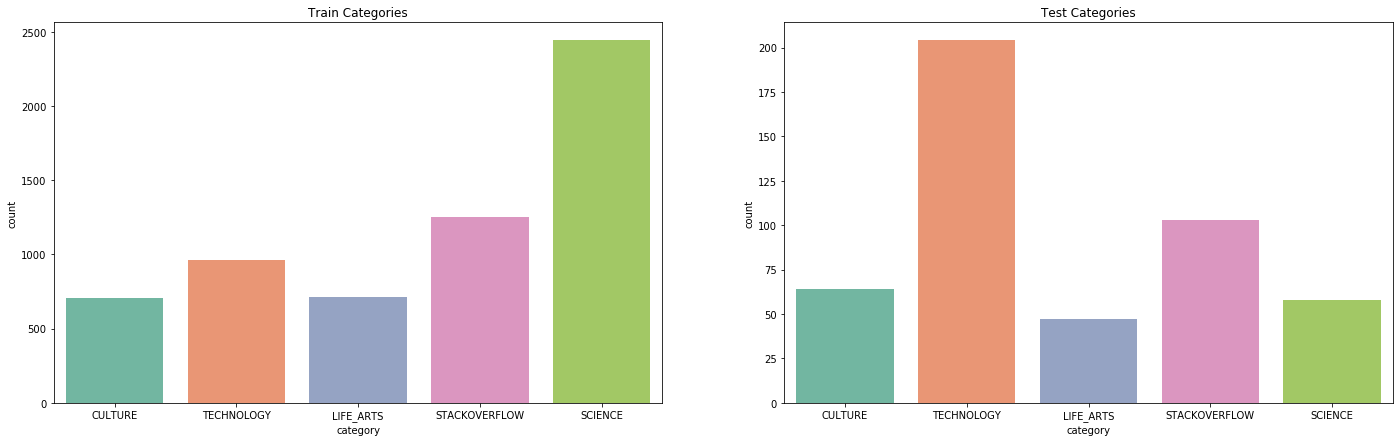

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7), sharex=True)
sns.countplot(train['category'], palette="Set2", ax=ax1).set_title("Train Categories")
sns.countplot(test['category'], palette="Set2", ax=ax2).set_title("Test Categories")
plt.show()

#### Question titles

In [34]:
train_title_group = train[['qa_id', 'question_title']].groupby('question_title').\
              count().reset_index().\
              sort_values('qa_id', ascending=False)
test_title_group = test[['qa_id', 'question_title']].groupby('question_title').\
              count().reset_index().\
              sort_values('qa_id', ascending=False)
train_title_group.head()

question_title  qa_id
2907  What is the best introductory Bayesian statist...     12
2844  What does mathematics have to do with programm...     11
1621    Important non-technical course for programmers?     11
1470   How to prevent the "Too awesome to use" syndrome      9
2795   What are the benefits of owning a physical book?      7

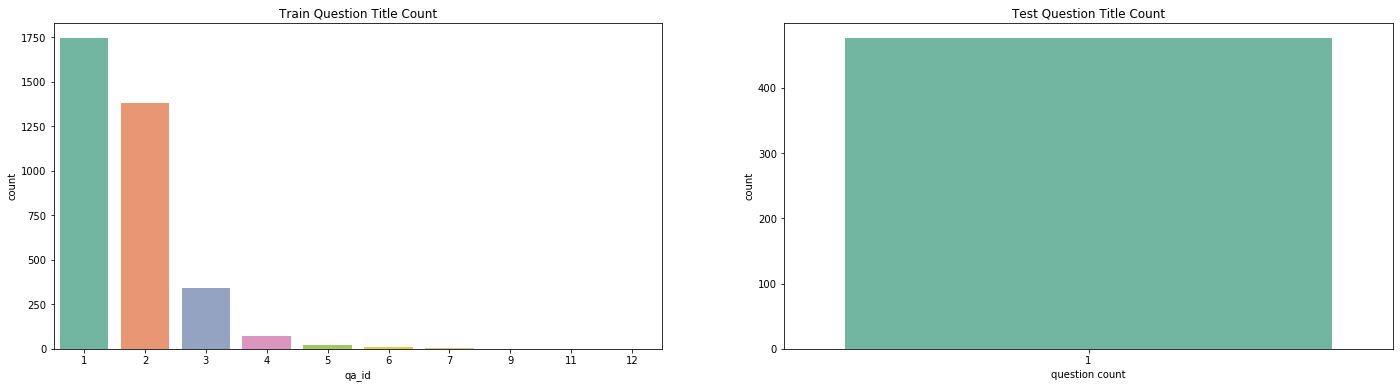

In [35]:
f,(ax_1, ax_2) = plt.subplots(1, 2, figsize=(24, 6))
sns.countplot(x="qa_id", data=train_title_group, palette="Set2", ax= ax_1).set_title("Train Question Title Count")
sns.countplot(x="qa_id", data=test_title_group, palette="Set2", ax = ax_2).set_title("Test Question Title Count")
plt.xlabel("question count")
plt.show()

Text(0.5, 1.0, 'Test Question Title Length')

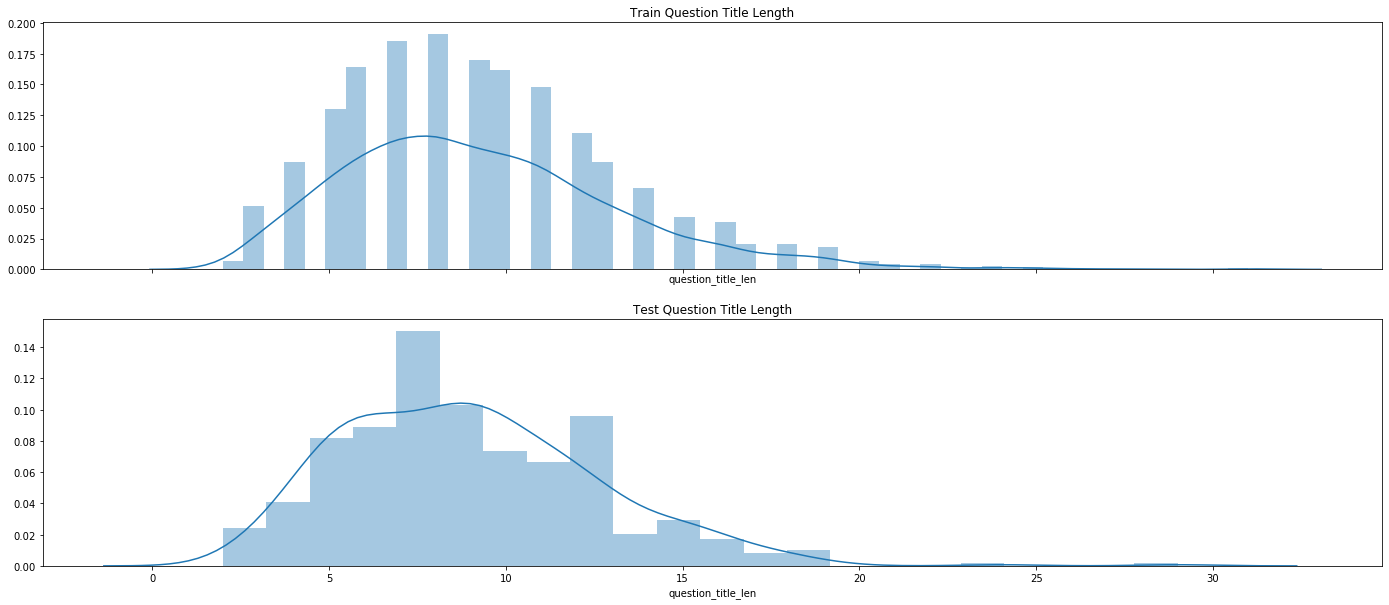

In [99]:
TOKENIZER = RegexpTokenizer(r'\w+')

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 10), sharex=True)
train['question_title_len'] = train['question_title'].apply(lambda x :  len(TOKENIZER.tokenize(x)))
test['question_title_len'] = test['question_title'].apply(lambda x :  len(TOKENIZER.tokenize(x)))

sns.distplot(train['question_title_len'], ax = ax1).set_title("Train Question Title Length")
sns.distplot(test['question_title_len'], ax = ax2).set_title("Test Question Title Length")


#### Question bodies

In [100]:
train_body_group = train[['qa_id', 'question_body']].groupby('question_body').\
              count().reset_index().\
              sort_values('qa_id', ascending=False)
test_body_group = test[['qa_id', 'question_body']].groupby('question_body').\
              count().reset_index().\
              sort_values('qa_id', ascending=False)
train_body_group.head()

question_body  qa_id
3442  Which is the best introductory textbook for Ba...     12
1525  I just started a diploma in software developme...     11
3358  What kind of non-technical training course do ...     11
3431  When you give the player a rare but powerful i...      9
1503  I installed Ubuntu 12.04 a month ago and am us...      7

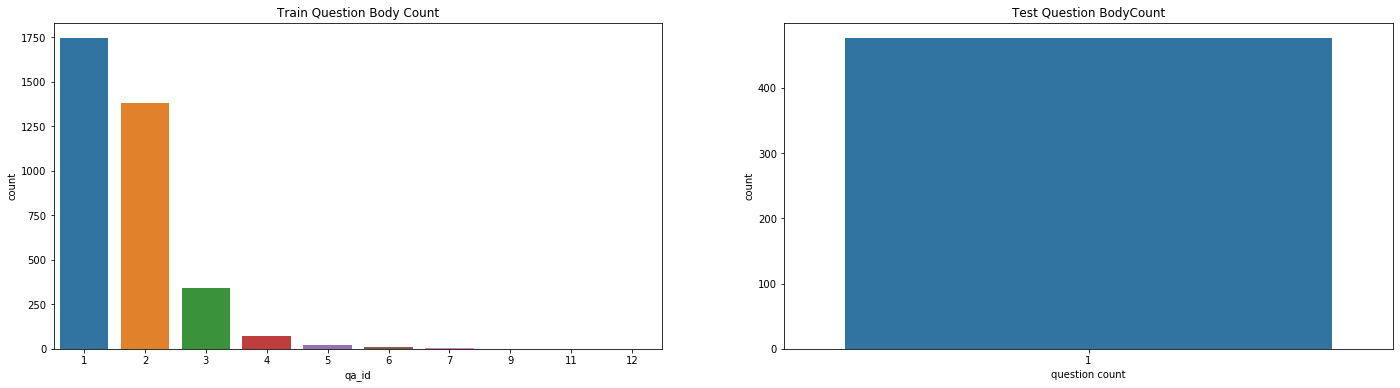

In [101]:
f,(ax_1, ax_2) = plt.subplots(1, 2, figsize=(24, 6))
sns.countplot(x="qa_id", data=train_body_group, ax= ax_1).set_title("Train Question Body Count")
sns.countplot(x="qa_id", data=test_body_group, ax = ax_2).set_title("Test Question BodyCount")
plt.xlabel("question count")
plt.show()

Text(0.5, 1.0, 'Test Question Body Length')

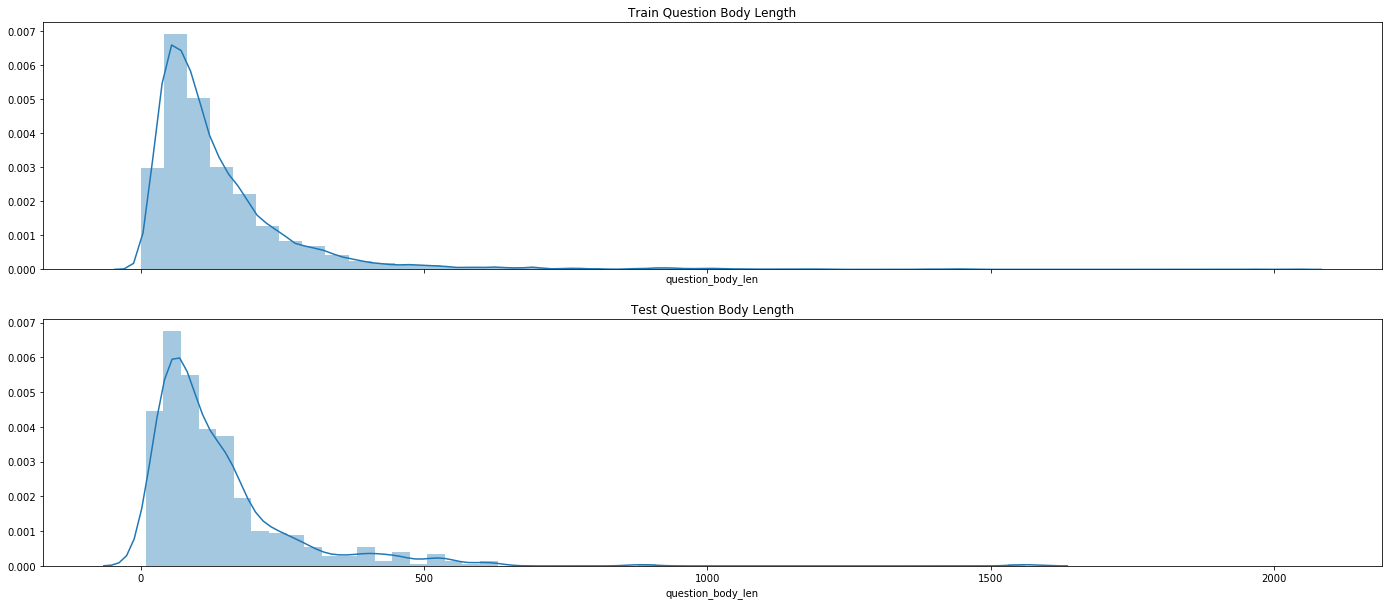

In [102]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 10), sharex=True)
train['question_body_len'] = train['question_body'].apply(lambda x : len(TOKENIZER.tokenize(x)))
test['question_body_len'] = test['question_body'].apply(lambda x :  len(TOKENIZER.tokenize(x)))

sns.distplot(train['question_body_len'], ax = ax1).set_title("Train Question Body Length")
sns.distplot(test['question_body_len'], ax = ax2).set_title("Test Question Body Length")


In [104]:
question_bodies = " ".join(question_body for question_body in list(train["question_body"]))
print ("There are {} words in the combination of all questions.".format(len(question_bodies)))

There are 5074508 words in the combination of all questions.


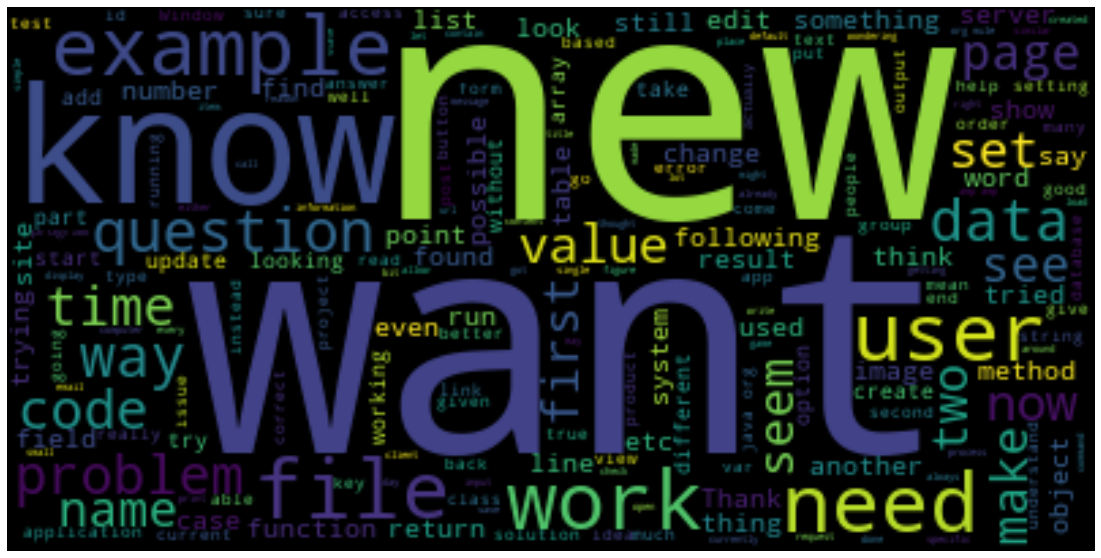

In [105]:
stopwords = set(STOPWORDS)
stopwords.update(["gt", "lt", "one", "use", "will","using"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(question_bodies)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Question User Name

In [17]:
train_quser_group = train[['qa_id','question_user_name', 'question_user_page']].groupby(['question_user_name','question_user_page']).\
              count().reset_index().\
              sort_values('qa_id', ascending=False)
test_quser_group = test[['qa_id', 'question_user_name', 'question_user_page']].groupby(['question_user_name', 'question_user_page']).\
              count().reset_index().\
              sort_values('qa_id', ascending=False)
train_quser_group.head()

question_user_name                                 question_user_page  \
1907              Shane            https://stats.stackexchange.com/users/5   
175              András           https://rpg.stackexchange.com/users/9552   
1200         Louis Rhys   https://programmers.stackexchange.com/users/8486   
1798               Rory  https://programmers.stackexchange.com/users/48536   
501      DVK-on-Ahch-To          https://scifi.stackexchange.com/users/976   

      qa_id  
1907     12  
175      11  
1200     11  
1798     11  
501      10

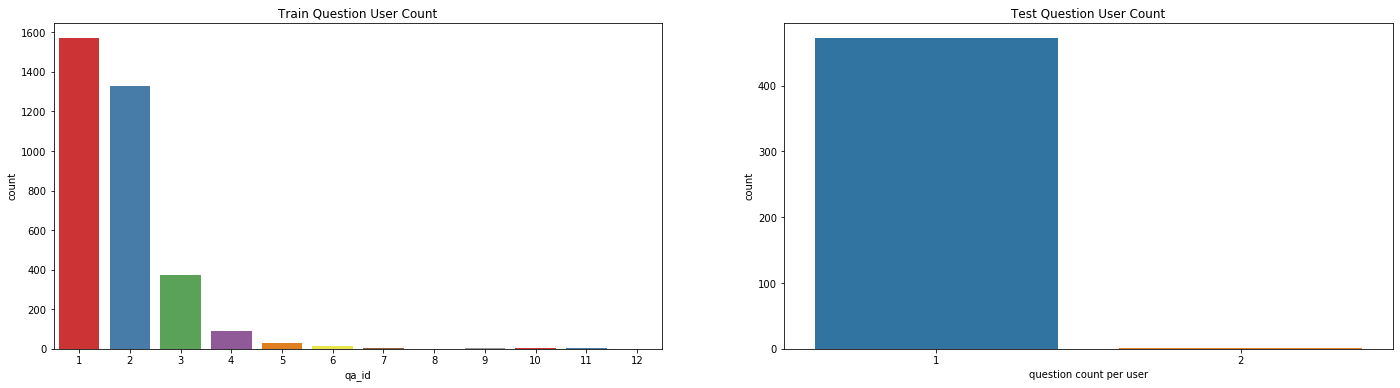

In [18]:
f,(ax_1, ax_2) = plt.subplots(1, 2, figsize=(24, 6))
sns.countplot(x="qa_id", data=train_quser_group, palette="Set1", ax= ax_1).set_title("Train Question User Count")
sns.countplot(x="qa_id", data=test_quser_group, ax = ax_2).set_title("Test Question User Count")
plt.xlabel("question count per user")
plt.show()

#### Answer

Text(0.5, 1.0, 'Test Answer Length')

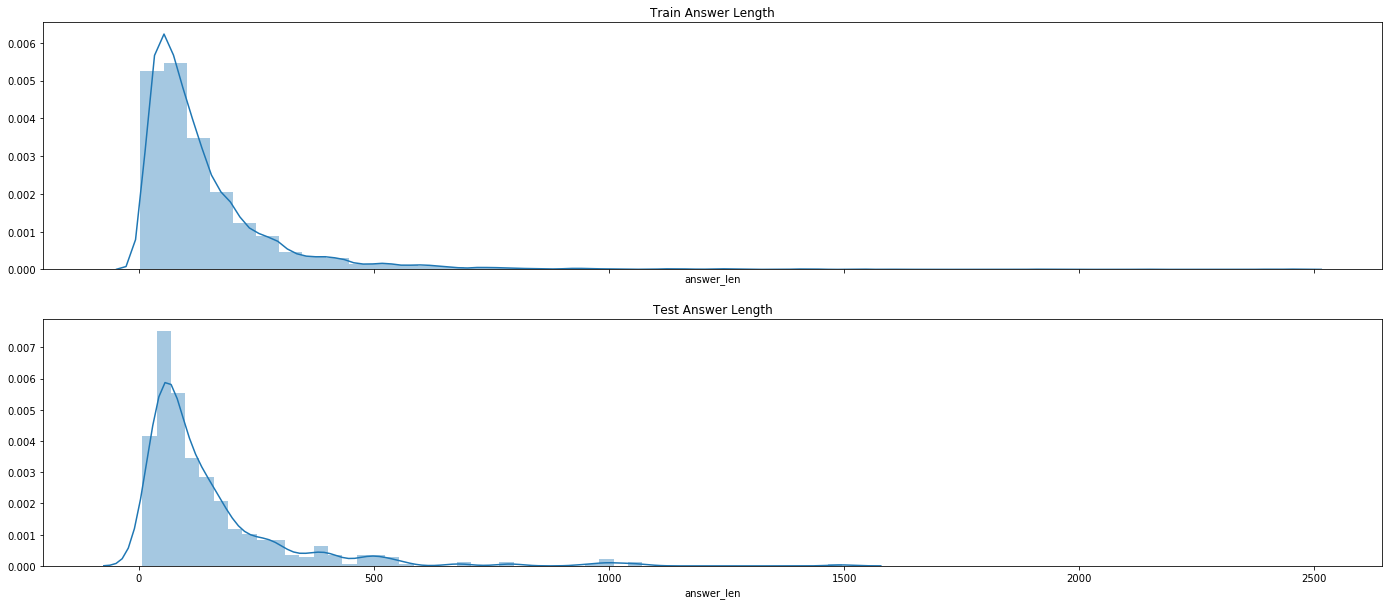

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 10), sharex=True)
train['answer_len'] = train['answer'].apply(lambda x :  len(TOKENIZER.tokenize(x)))
test['answer_len'] = test['answer'].apply(lambda x :  len(TOKENIZER.tokenize(x)))

sns.distplot(train['answer_len'], ax = ax1).set_title("Train Answer Length")
sns.distplot(test['answer_len'], ax = ax2).set_title("Test Answer Length")

In [106]:
anwers = " ".join(anwer for anwer in list(train["answer"]))
print ("There are {} words in the combination of all questions.".format(len(anwers)))

There are 5108771 words in the combination of all questions.


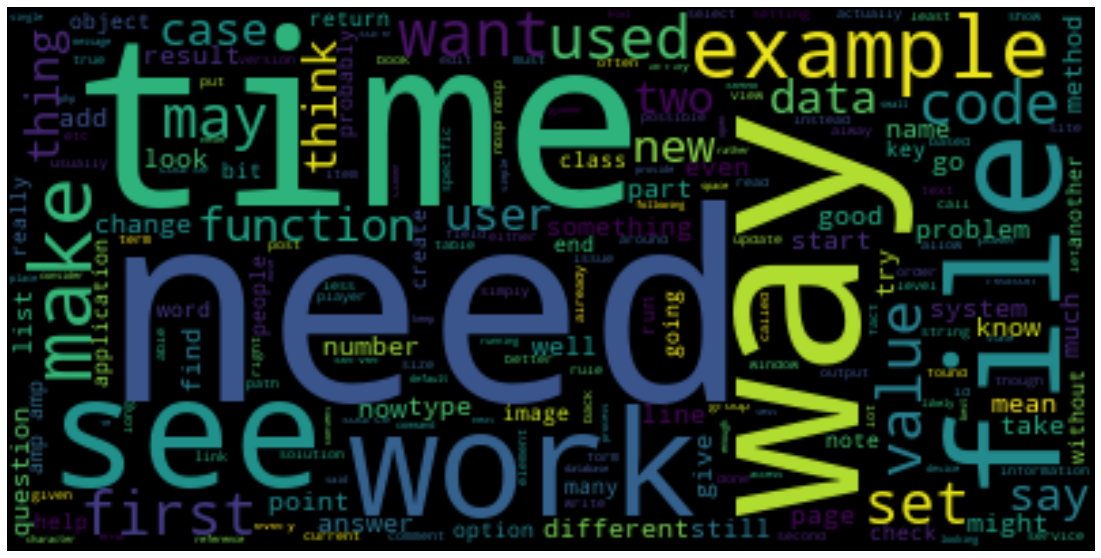

In [107]:
# Generate a word cloud image
wordcloud_anwers = WordCloud(stopwords=stopwords, background_color="black").generate(anwers)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_anwers, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Answer User Name

In [20]:
train_auser_group = train[['qa_id','answer_user_name', 'answer_user_page']].groupby(['answer_user_name','answer_user_page']).\
              count().reset_index().\
              sort_values('qa_id', ascending=False)
test_auser_group = test[['qa_id', 'answer_user_name', 'answer_user_page']].groupby(['answer_user_name', 'answer_user_page']).\
              count().reset_index().\
              sort_values('qa_id', ascending=False)
train_auser_group.head()

answer_user_name                                   answer_user_page  \
3471            egreg           https://tex.stackexchange.com/users/4427   
2591            Scott  https://graphicdesign.stackexchange.com/users/...   
1797           Marius        https://magento.stackexchange.com/users/146   
238          Andy aka  https://electronics.stackexchange.com/users/20218   
2326        Pᴀᴜʟsᴛᴇʀ2     https://mechanics.stackexchange.com/users/4152   

      qa_id  
3471     17  
2591     16  
1797     15  
238      14  
2326     11

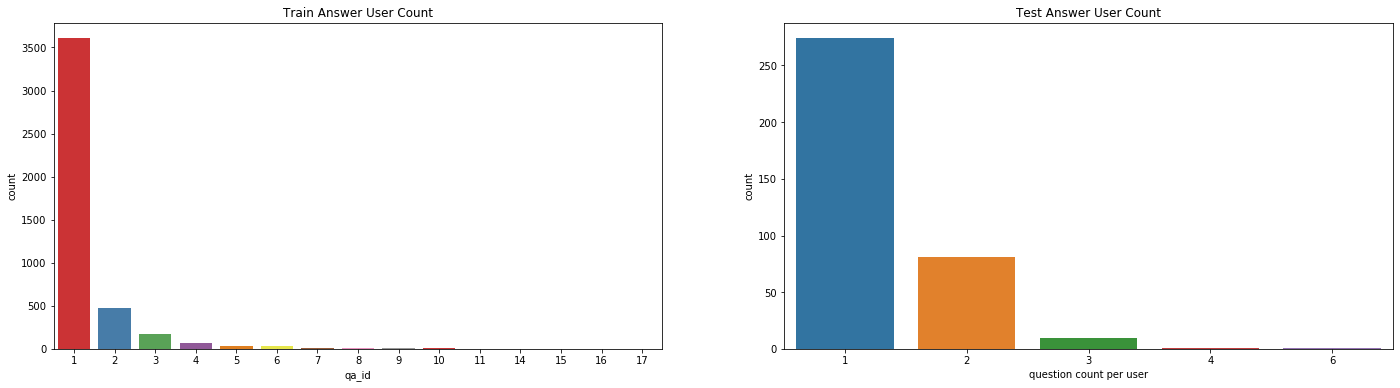

In [21]:
f,(ax_1, ax_2) = plt.subplots(1, 2, figsize=(24, 6))
sns.countplot(x="qa_id", data=train_auser_group, palette="Set1", ax= ax_1).set_title("Train Answer User Count")
sns.countplot(x="qa_id", data=test_auser_group, ax = ax_2).set_title("Test Answer User Count")
plt.xlabel("question count per user")
plt.show()

#### Length

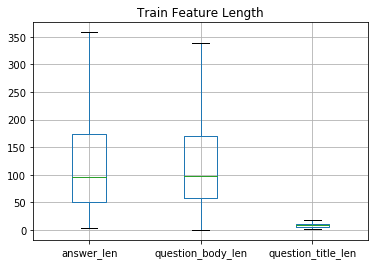

In [22]:
train[['answer_len', 'question_body_len', 'question_title_len']].plot(kind='box', showfliers=False)
plt.title("Train Feature Length")
plt.grid(b=None)

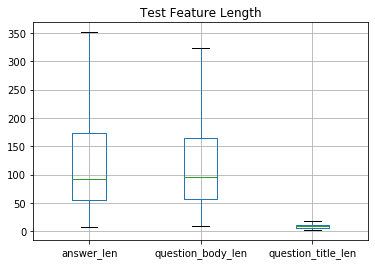

In [23]:
test[['answer_len', 'question_body_len', 'question_title_len']].plot(kind='box', showfliers=False)
plt.title("Test Feature Length")
plt.grid(b=None)

### Target variables

In [24]:
targets

['question_asker_intent_understanding',
 'question_body_critical',
 'question_conversational',
 'question_expect_short_answer',
 'question_fact_seeking',
 'question_has_commonly_accepted_answer',
 'question_interestingness_others',
 'question_interestingness_self',
 'question_multi_intent',
 'question_not_really_a_question',
 'question_opinion_seeking',
 'question_type_choice',
 'question_type_compare',
 'question_type_consequence',
 'question_type_definition',
 'question_type_entity',
 'question_type_instructions',
 'question_type_procedure',
 'question_type_reason_explanation',
 'question_type_spelling',
 'question_well_written',
 'answer_helpful',
 'answer_level_of_information',
 'answer_plausible',
 'answer_relevance',
 'answer_satisfaction',
 'answer_type_instructions',
 'answer_type_procedure',
 'answer_type_reason_explanation',
 'answer_well_written']

Text(0.5, 0, 'score')

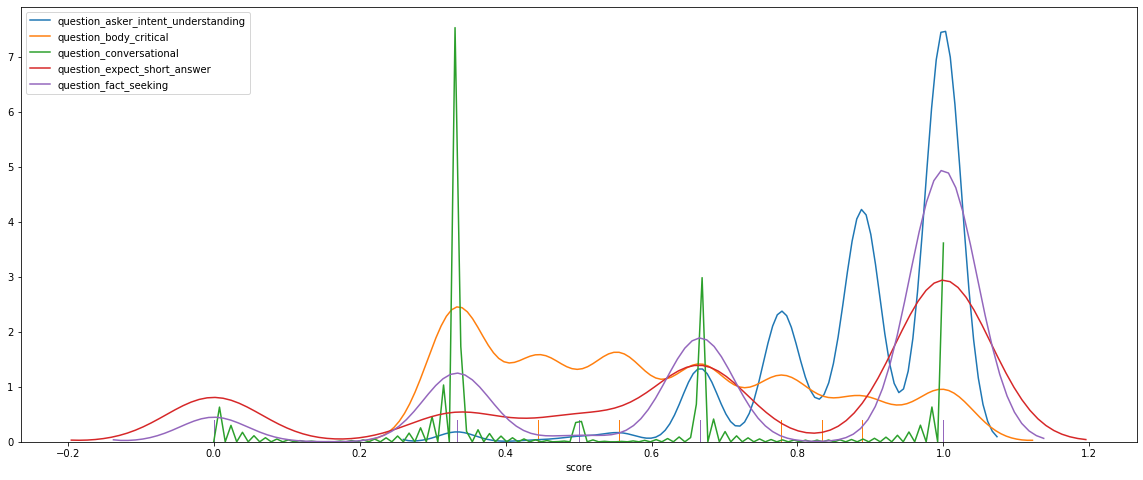

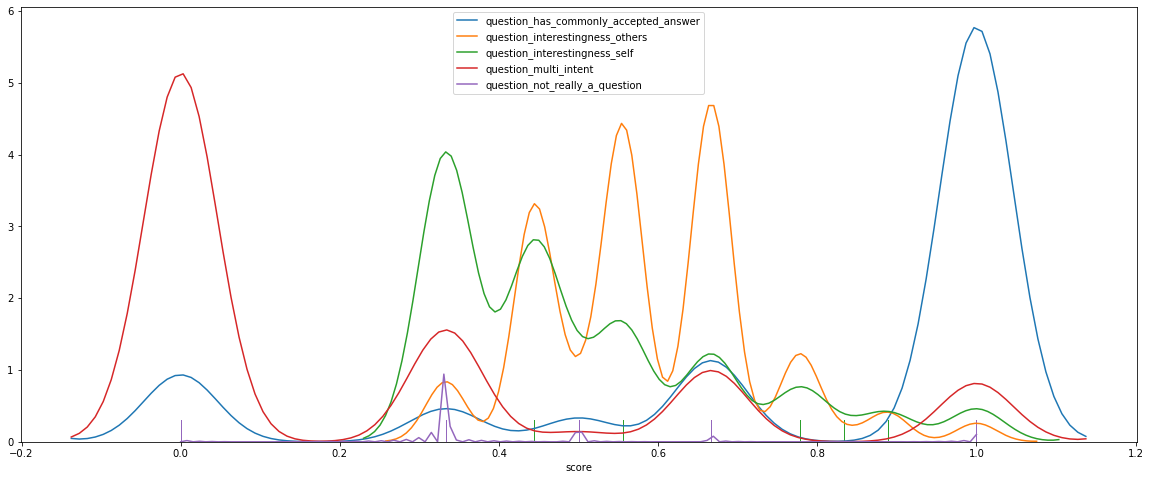

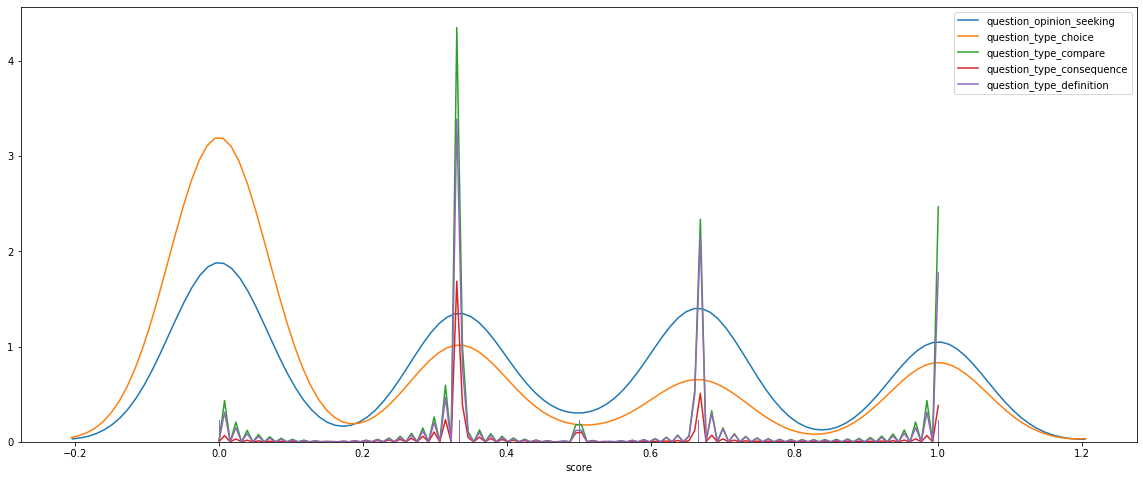

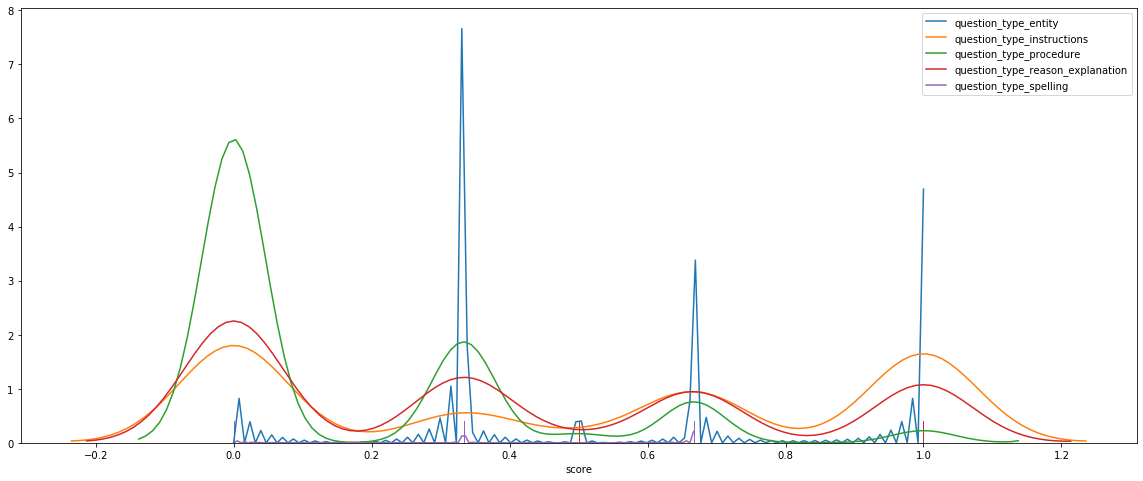

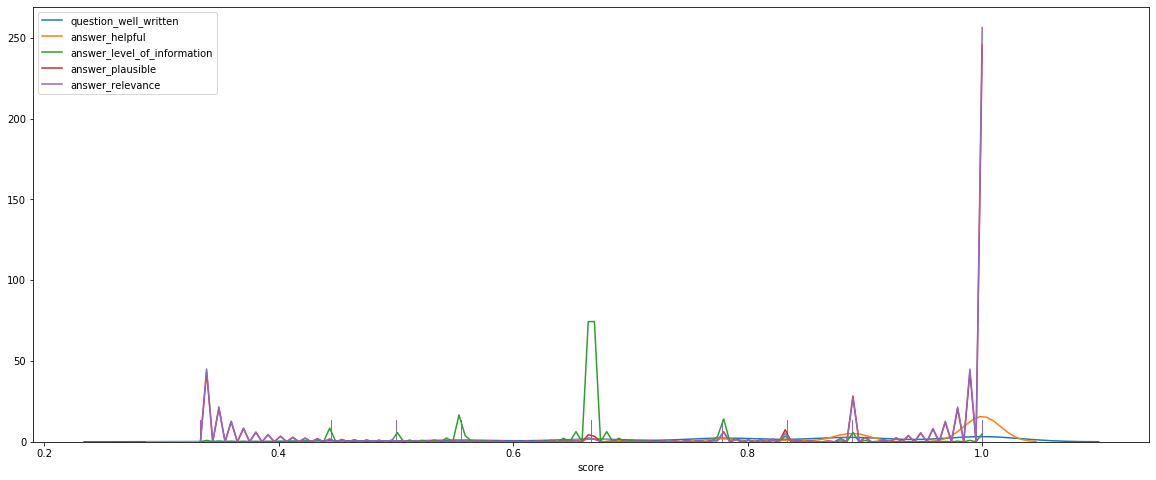

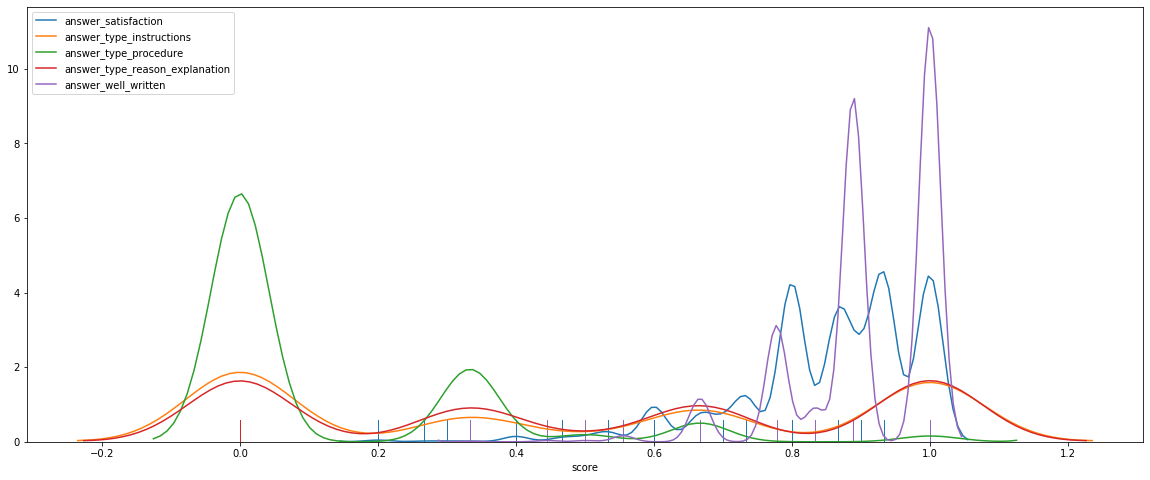

In [28]:
plt.figure(figsize=(20,8))
for c in targets[:5]:
    sns.distplot(train[c], label=c, rug=True, hist=False)
plt.xlabel("score")

plt.figure(figsize=(20,8))
for c in targets[5:10]:
    sns.distplot(train[c], label=c, rug=True, hist=False)
plt.xlabel("score")

plt.figure(figsize=(20,8))
for c in targets[10:15]:
    sns.distplot(train[c], label=c, rug=True, hist=False)
plt.xlabel("score")

plt.figure(figsize=(20,8))
for c in targets[15:20]:
    sns.distplot(train[c], label=c, rug=True, hist=False)
plt.xlabel("score")

plt.figure(figsize=(20,8))
for c in targets[20:25]:
    sns.distplot(train[c], label=c, rug=True, hist=False)
plt.xlabel("score")

plt.figure(figsize=(20,8))
for c in targets[25:]:
    sns.distplot(train[c], label=c, rug=True, hist=False)
plt.xlabel("score")

#### Target Correlation 

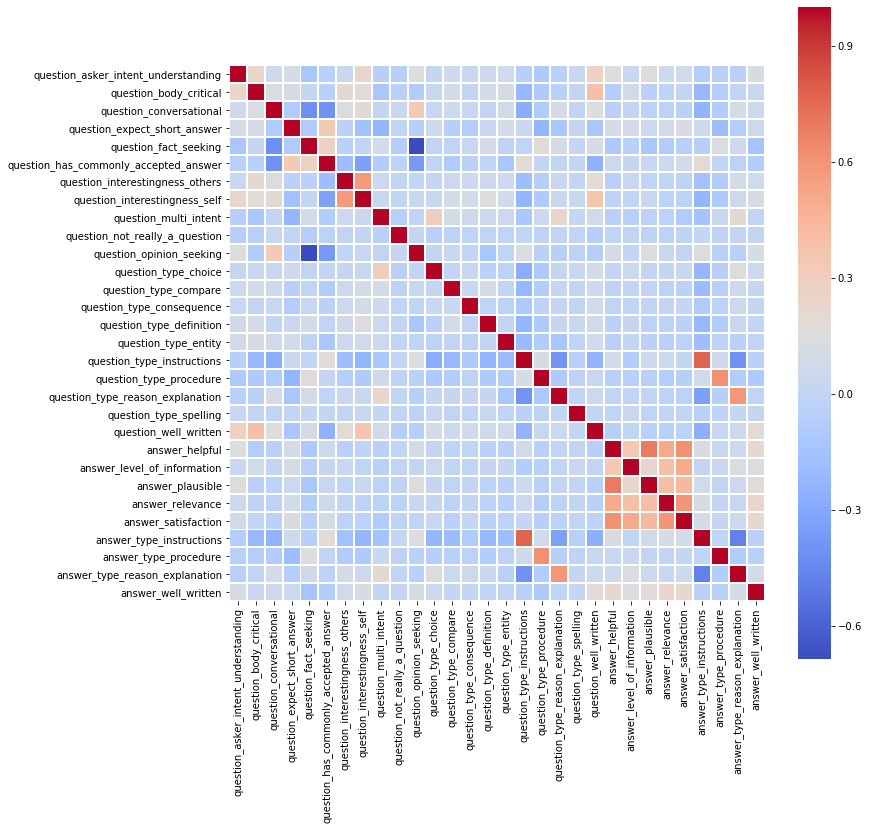

In [41]:
plt.figure(figsize=(12, 12))
sns.heatmap(data=train[targets].corr(), 
            square=True, 
            linewidths=1, 
            cmap="coolwarm")

#### Targets Vs. Answer length

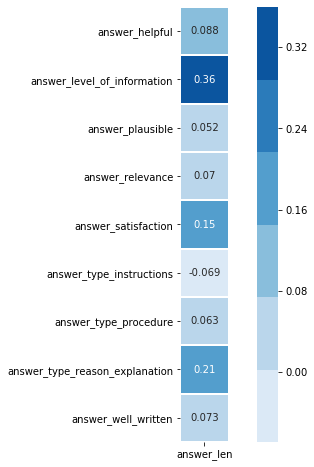

In [42]:
plt.figure(figsize=(10, 8))
corr = train[targets[21:] + ['answer_len']].corr().loc[['answer_len'], targets[21:]]
sns.heatmap(data=corr.T, 
            square=True, 
            linewidths=1, 
            annot=True,
            cmap=sns.color_palette("Blues"))

#### Scores by Categories

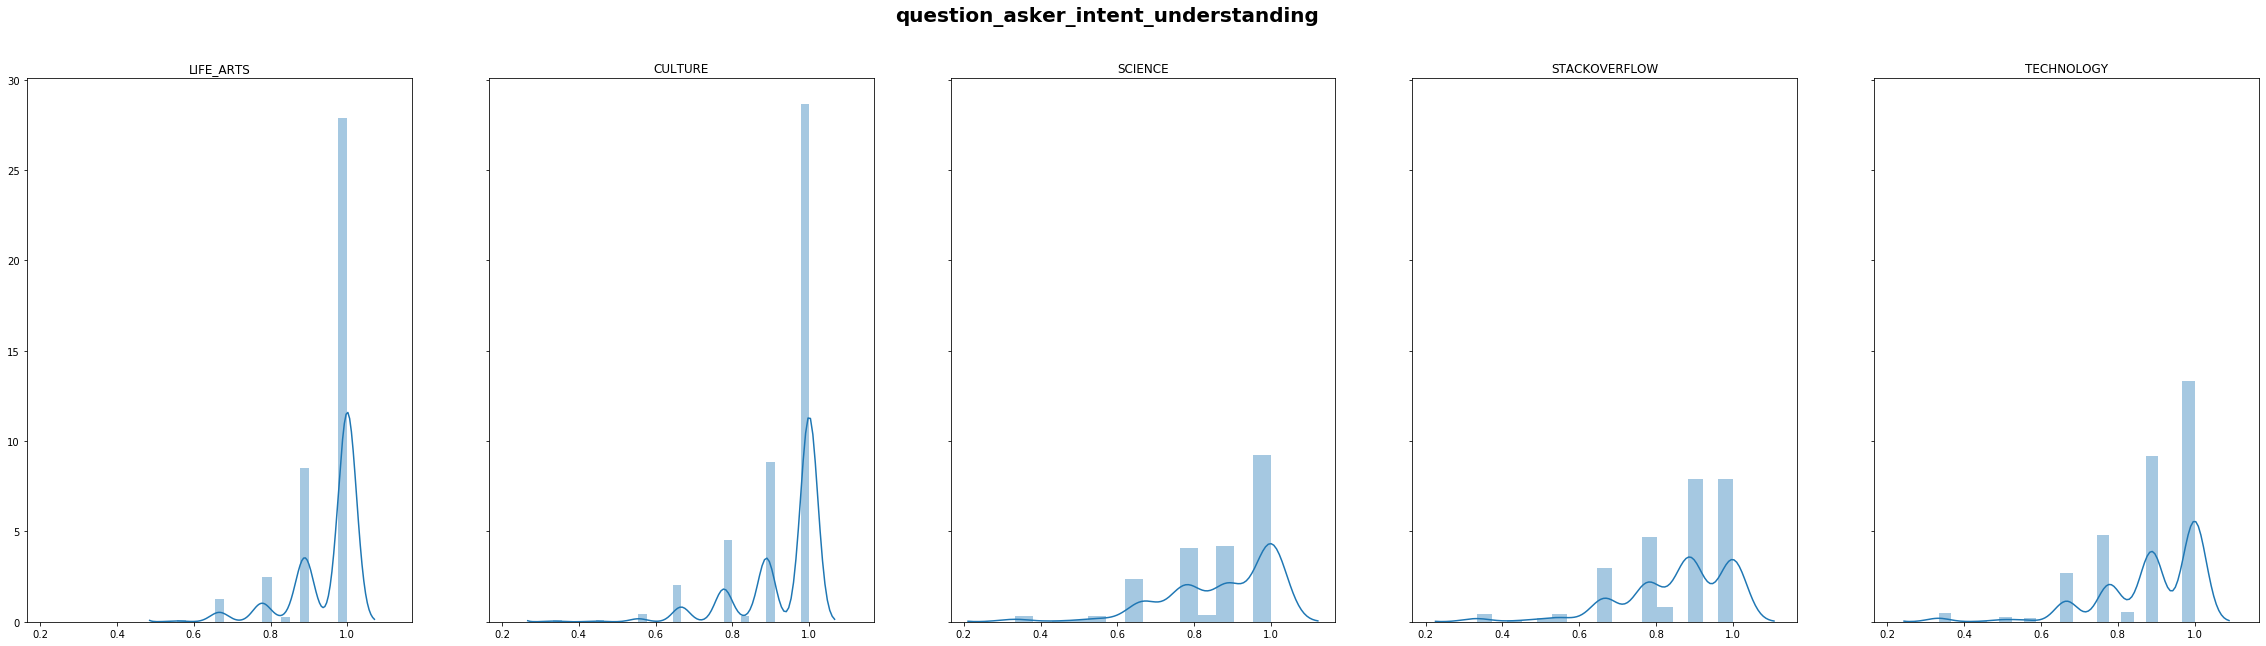

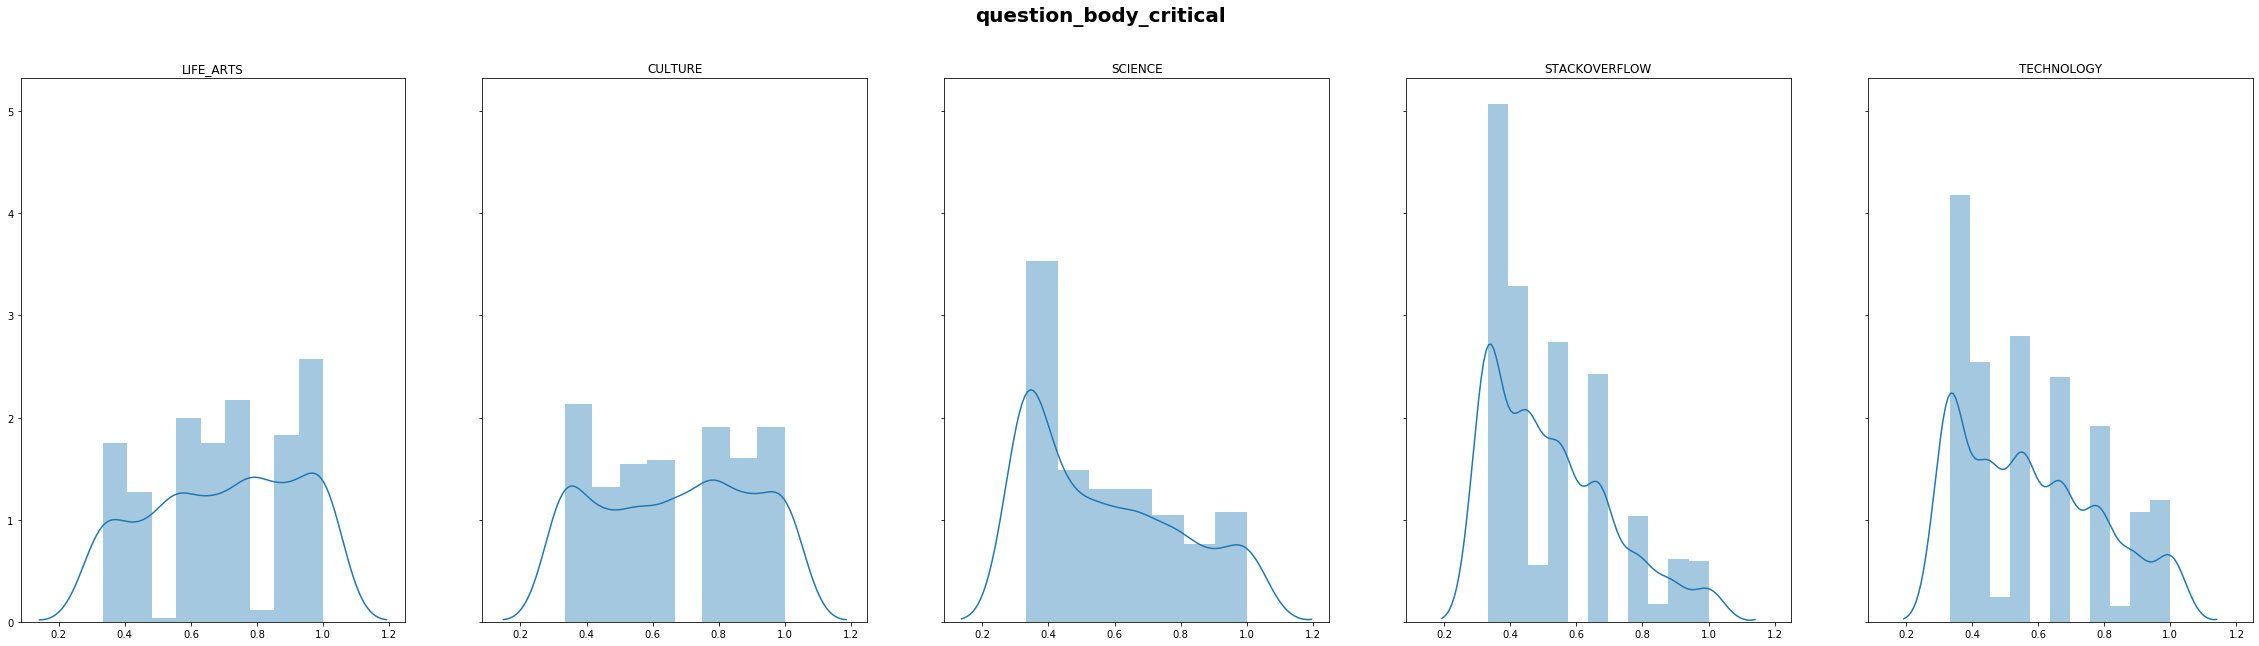

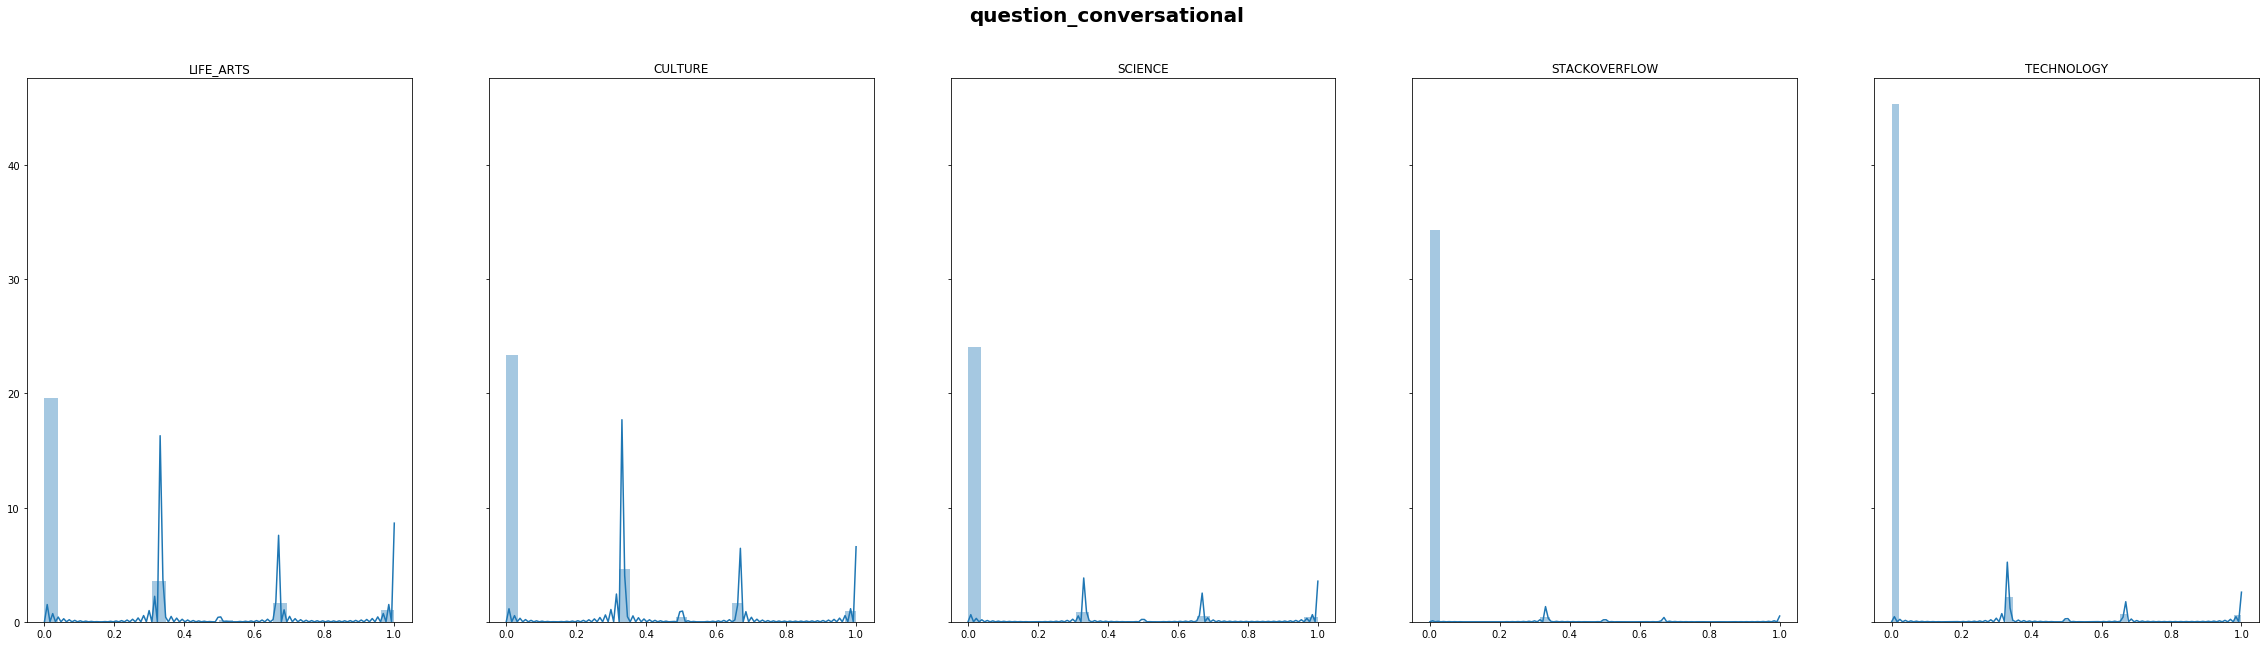

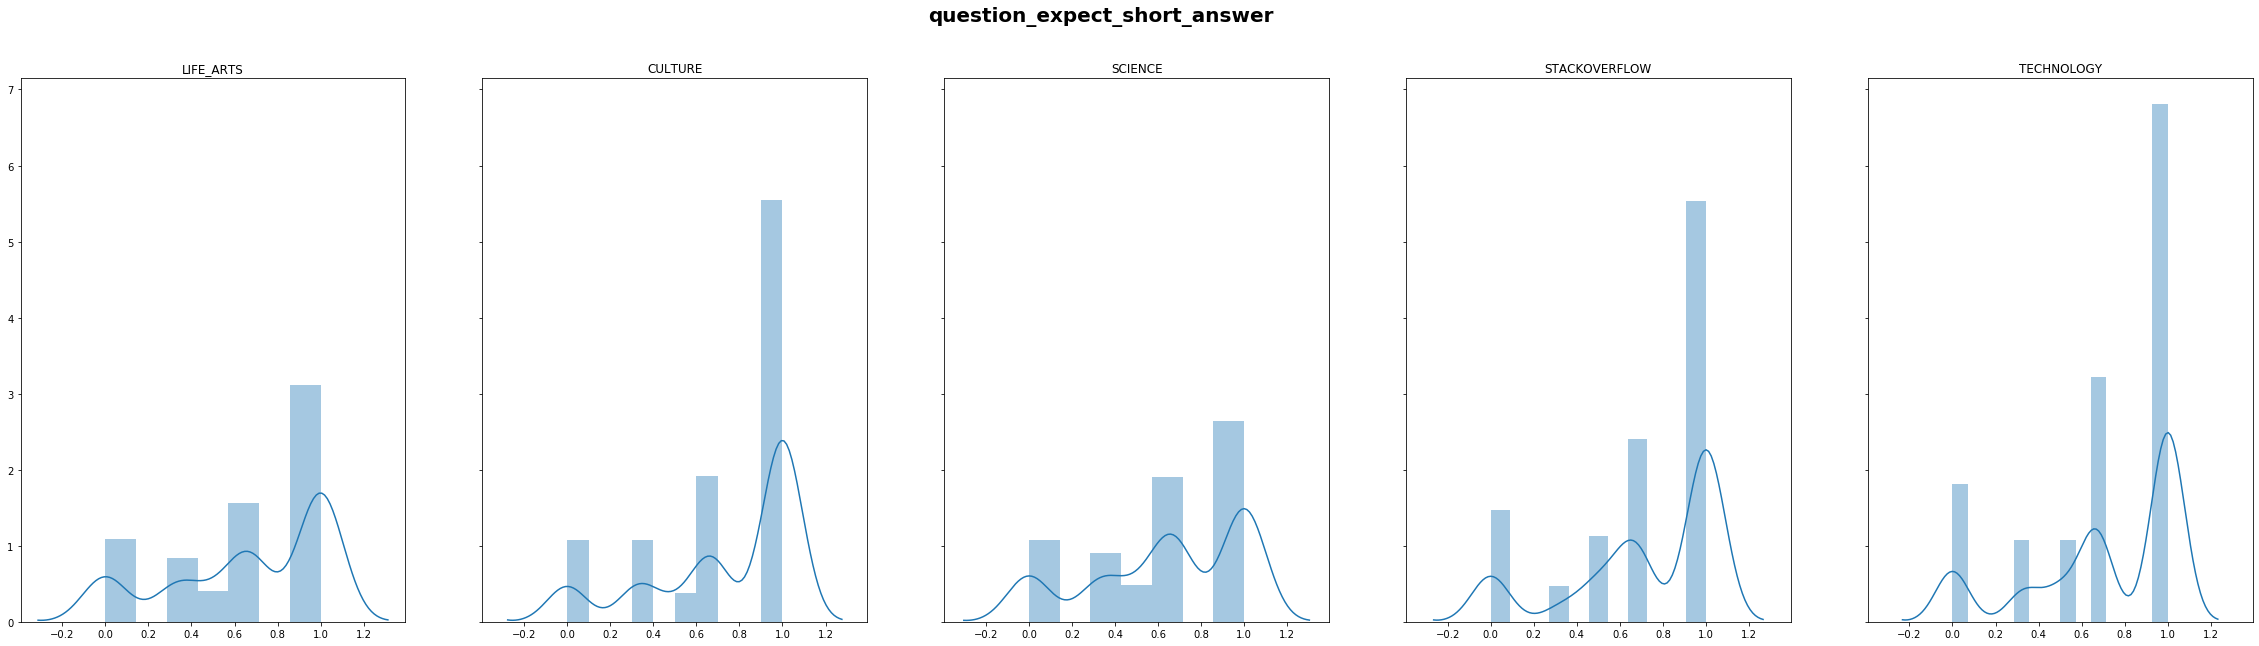

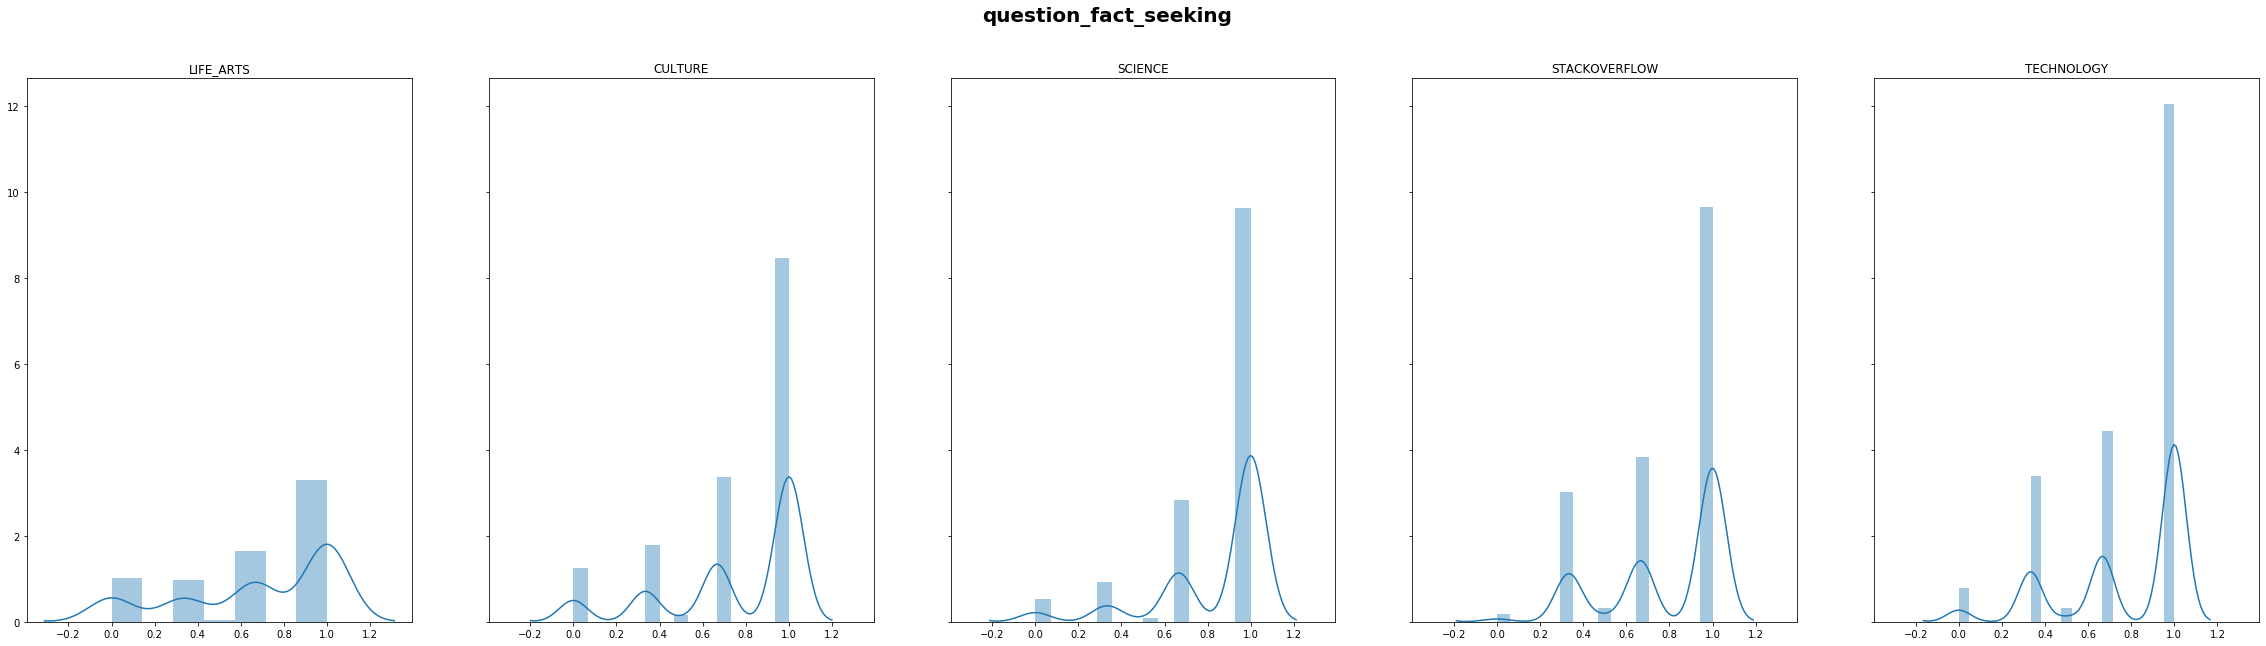

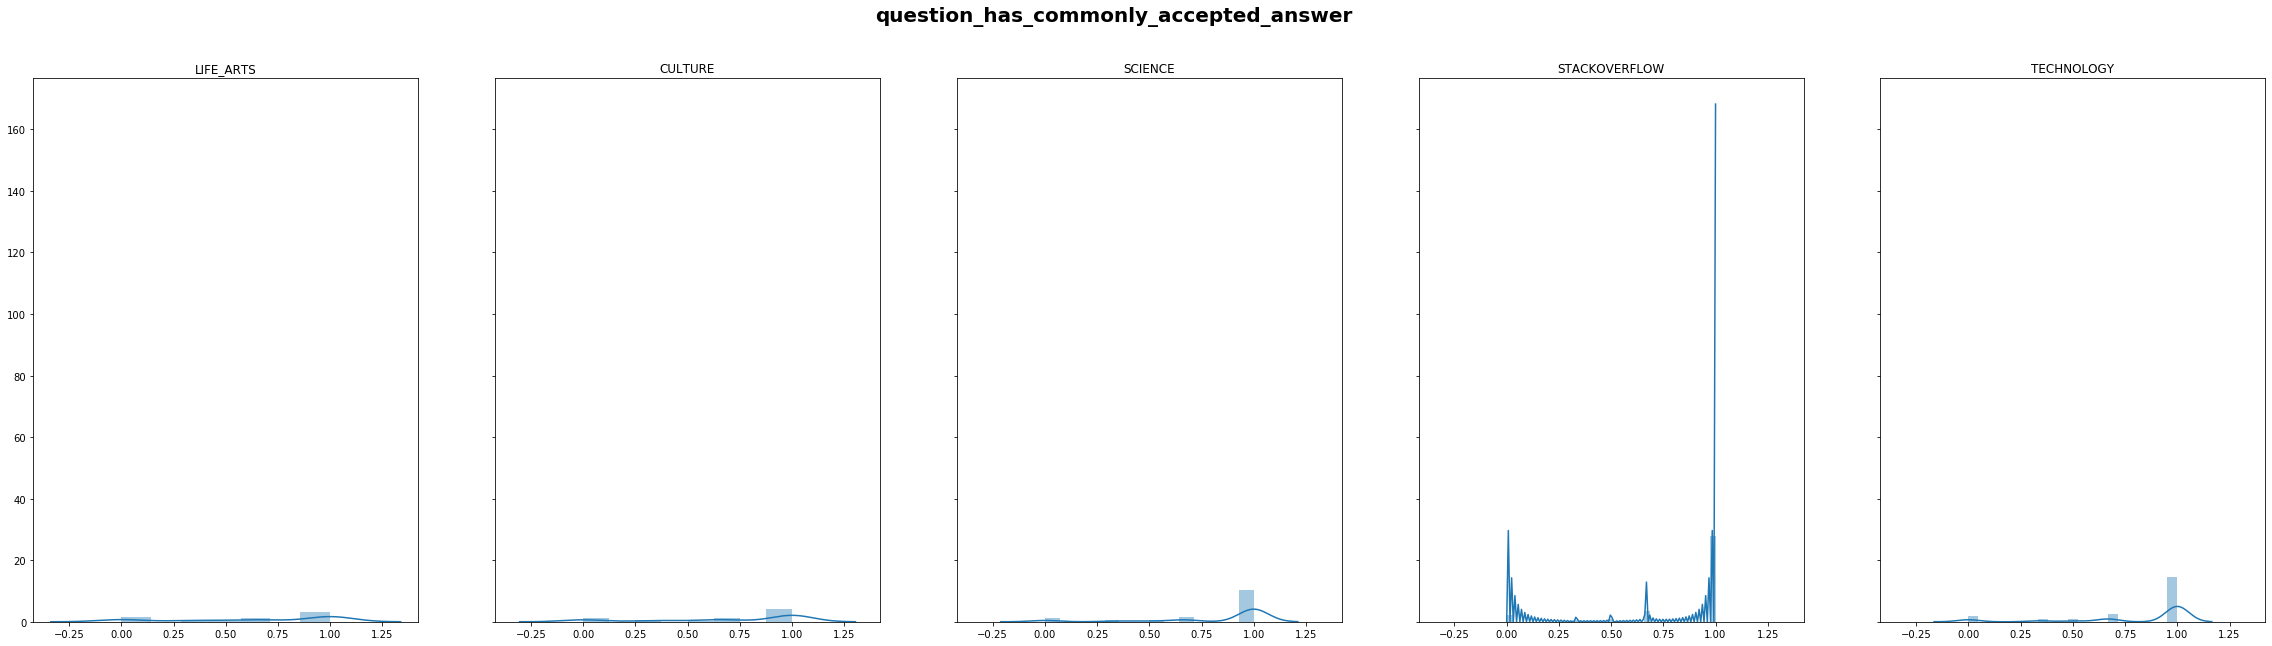

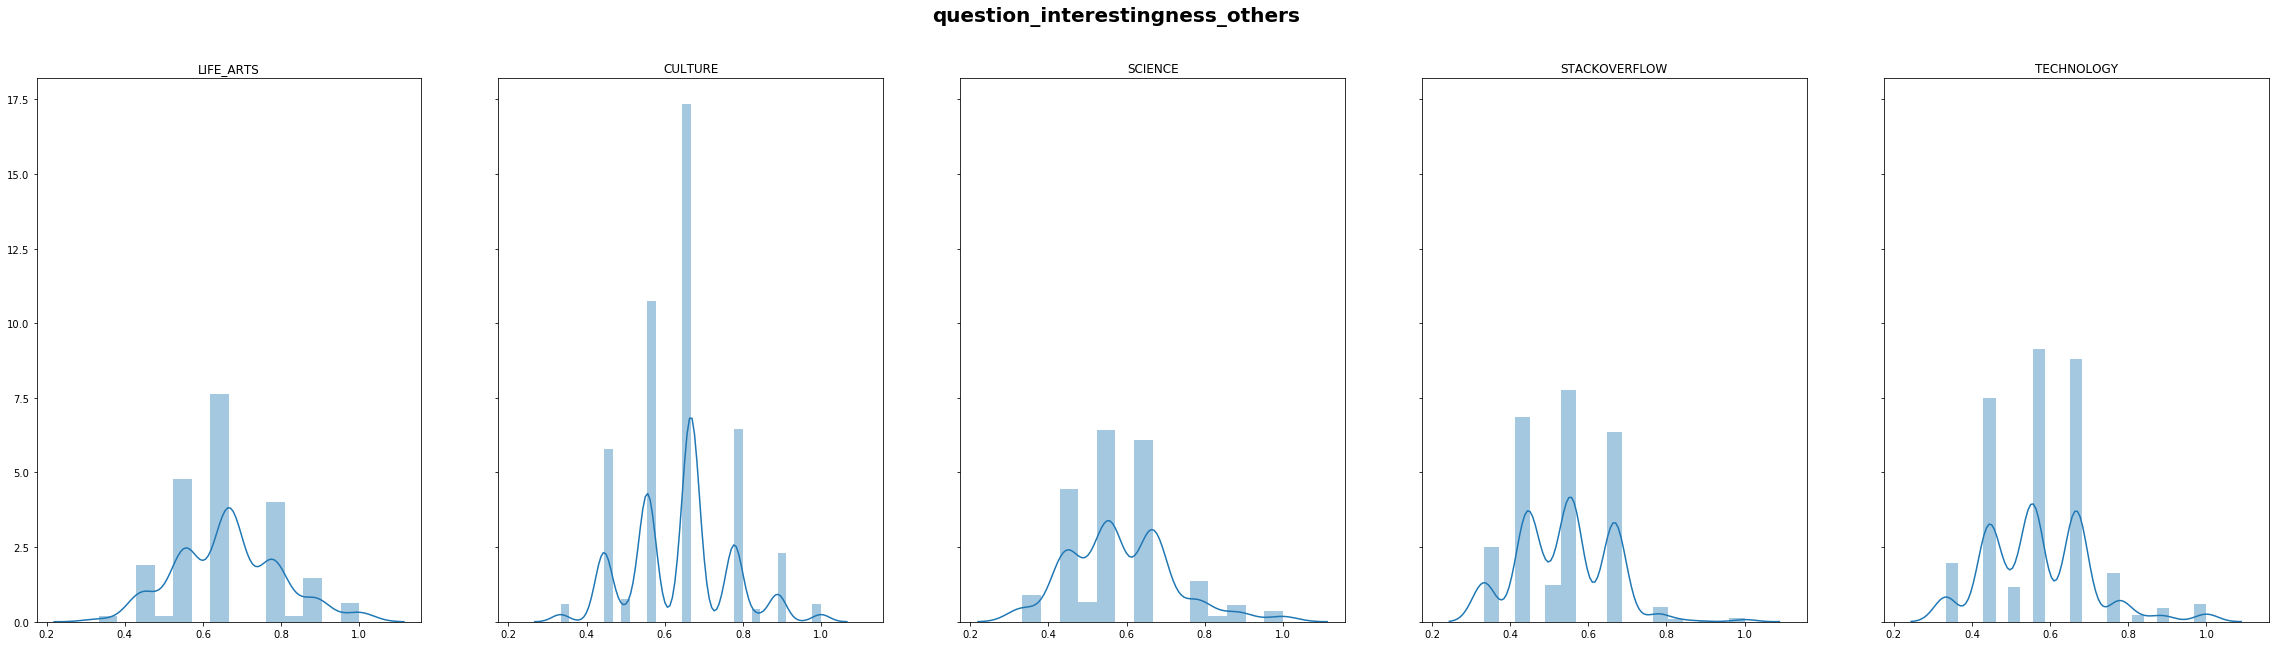

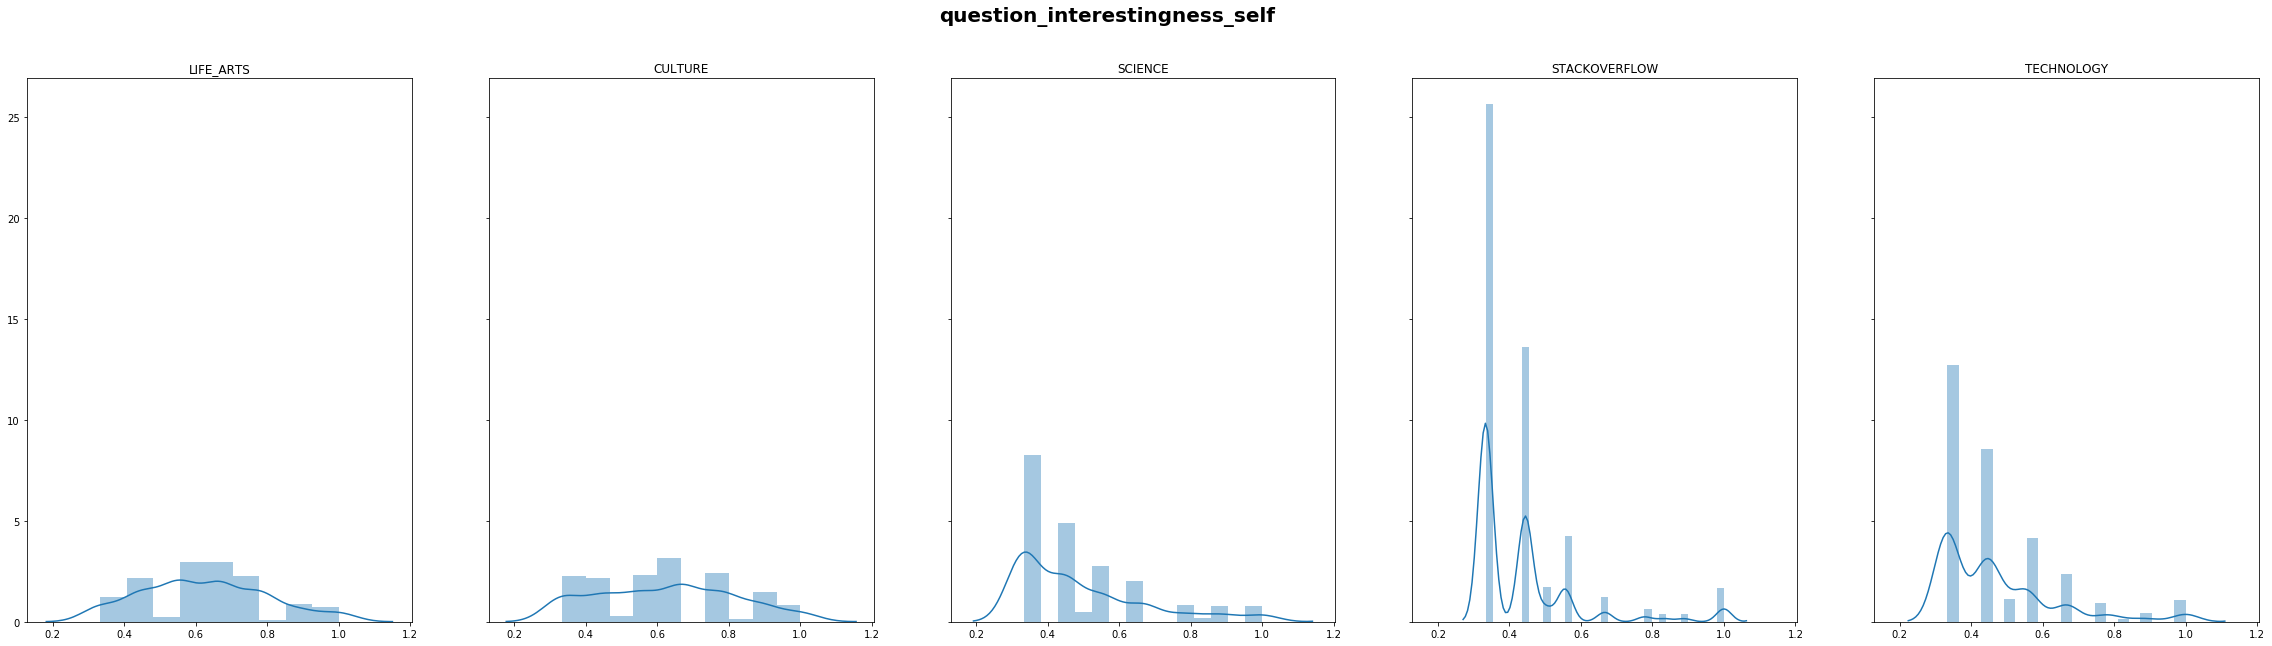

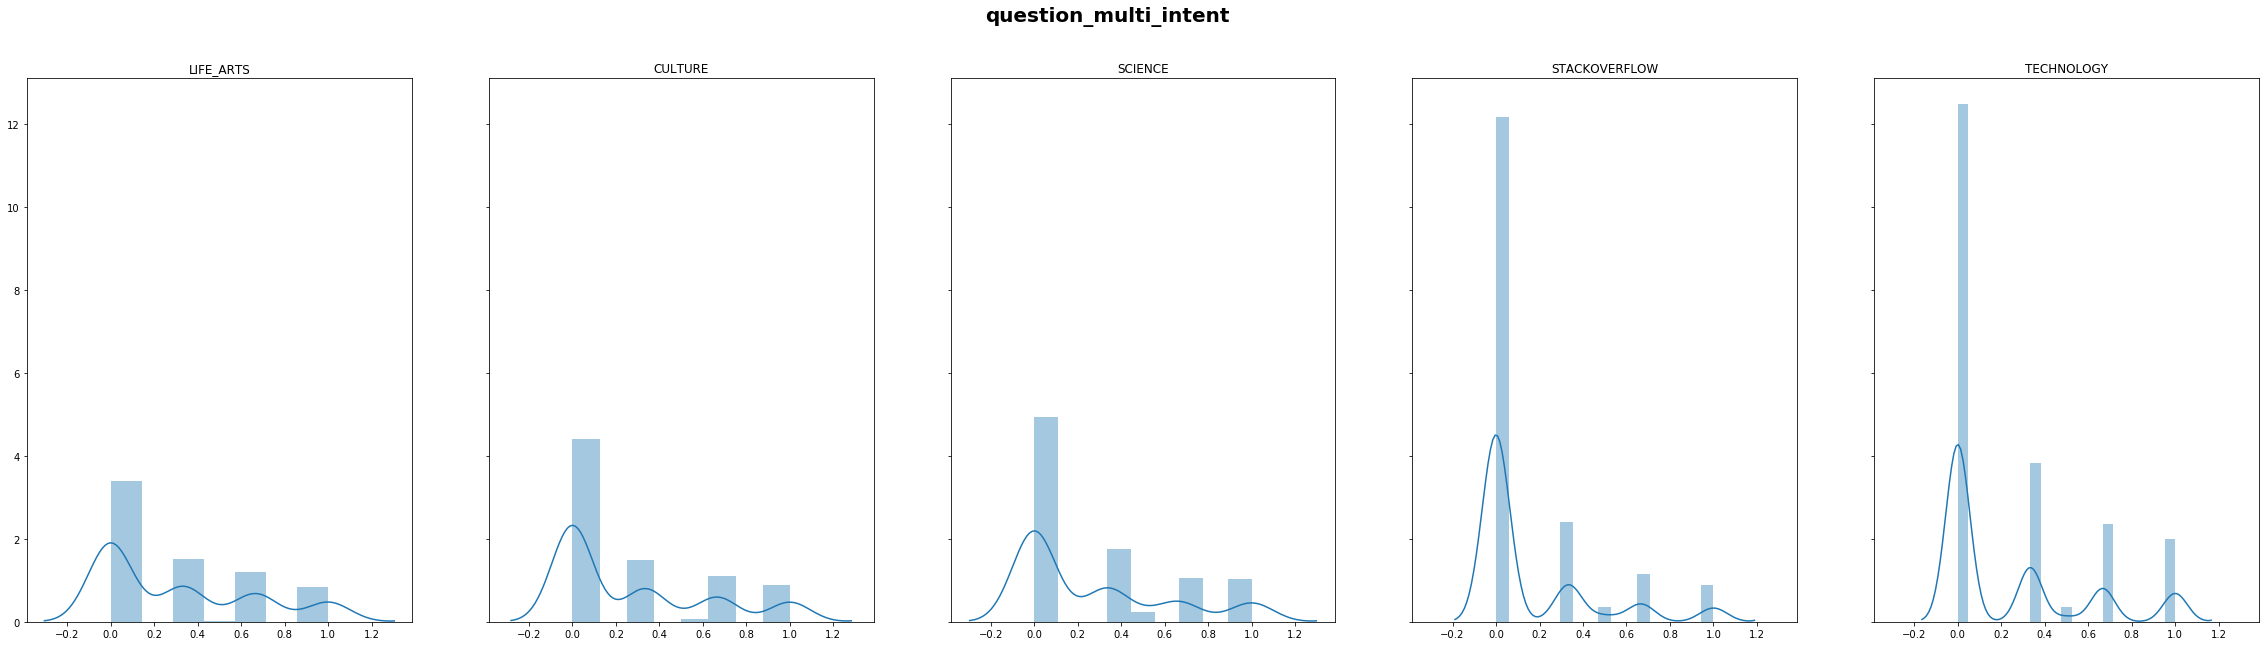

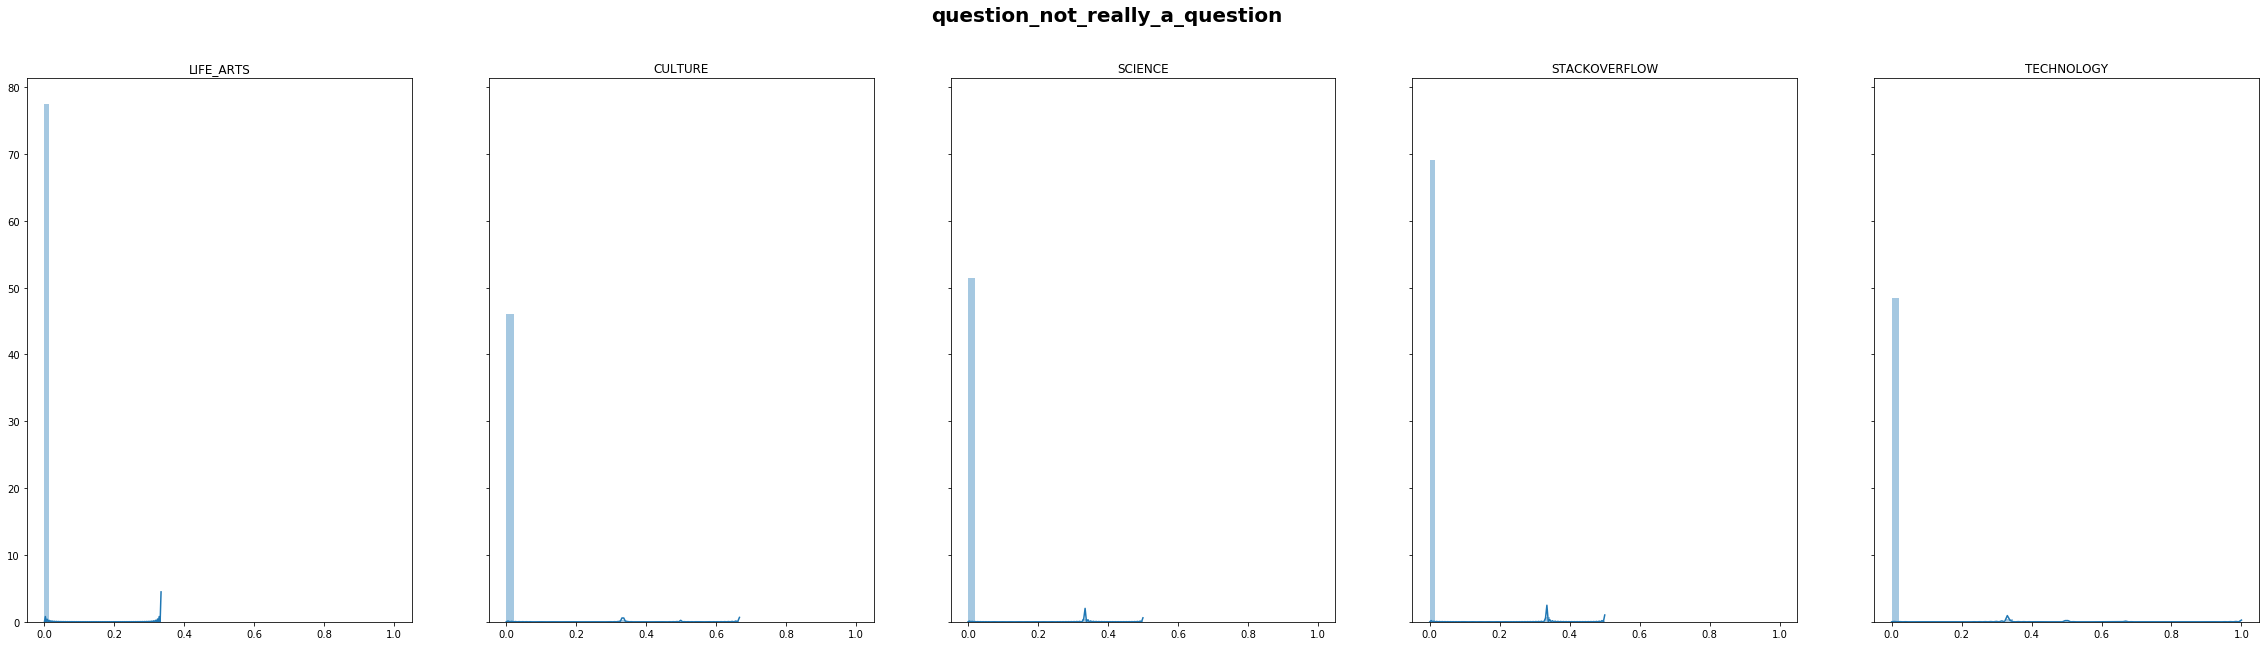

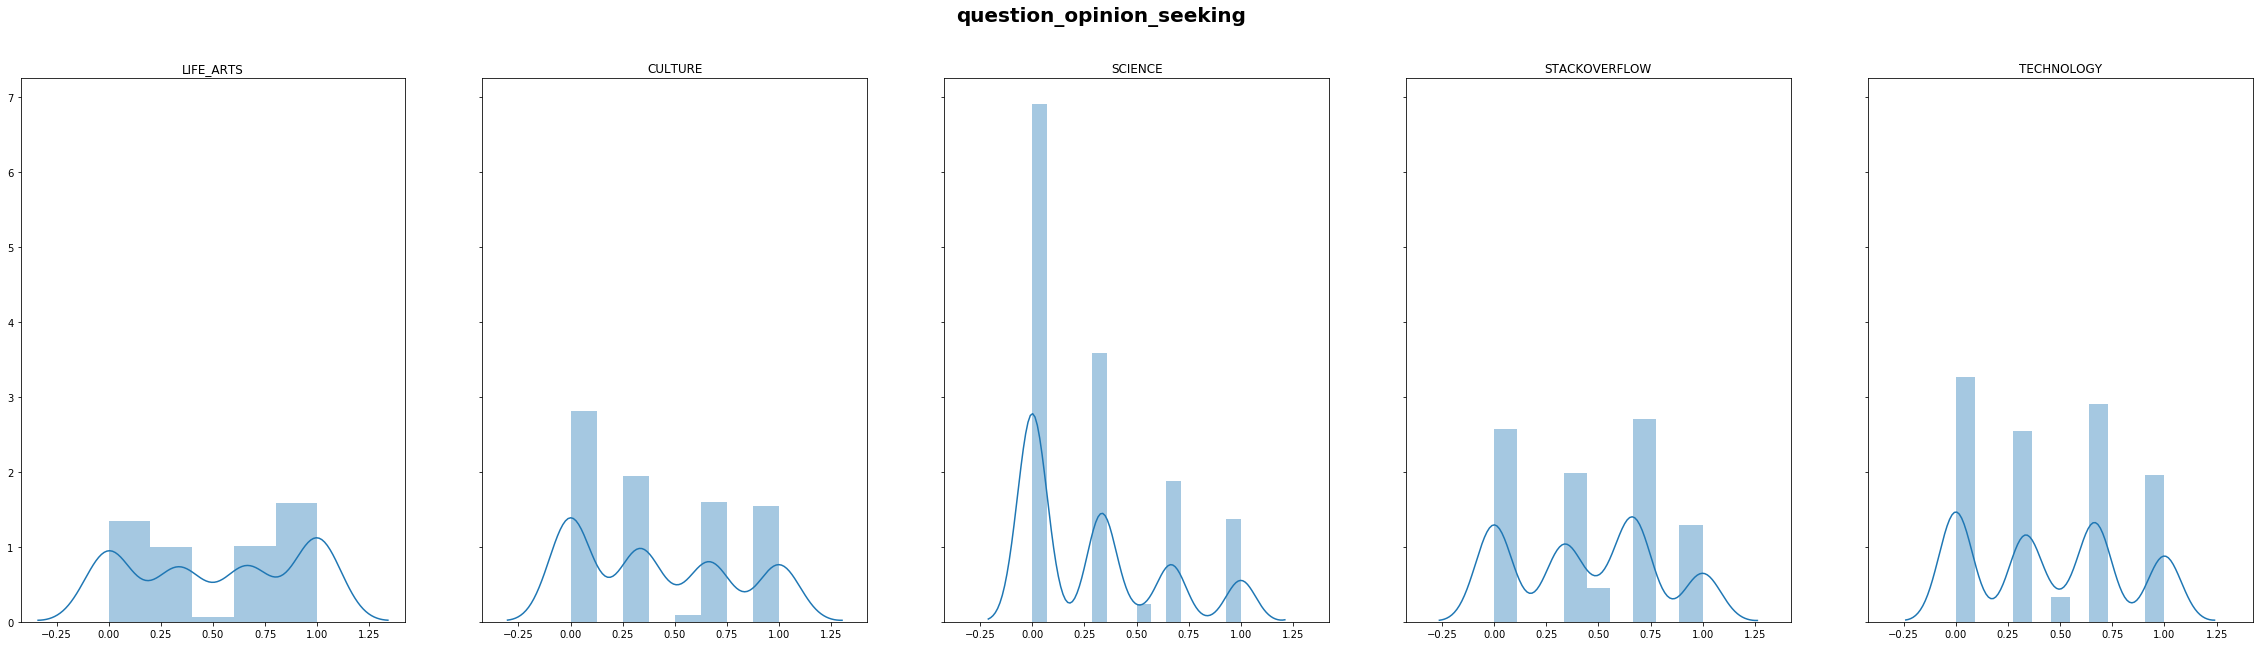

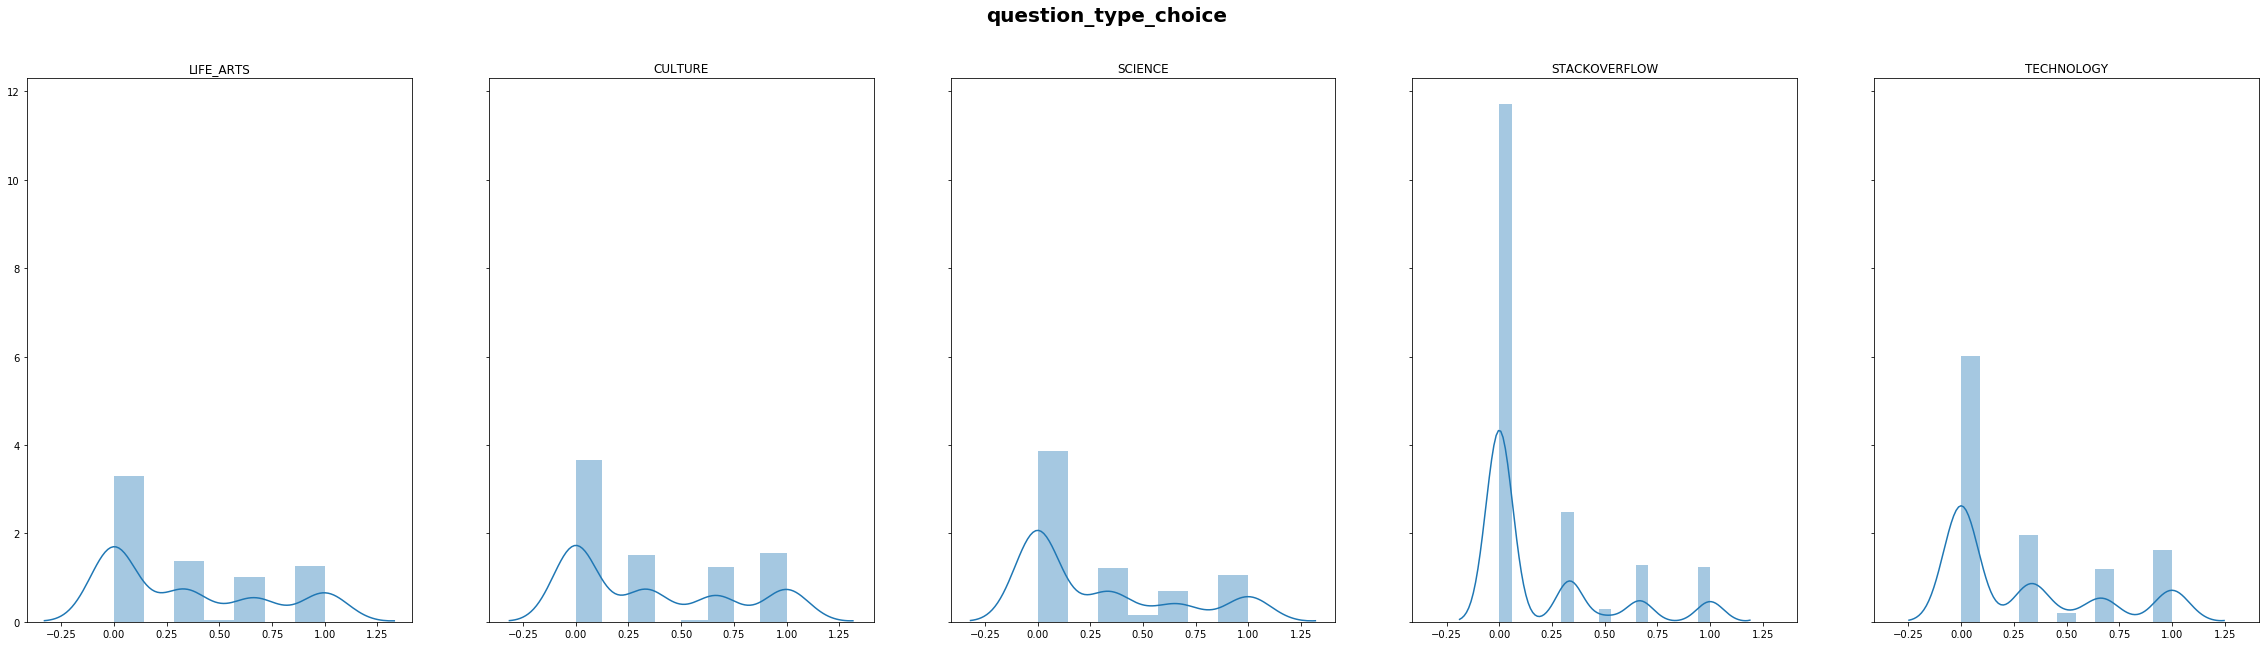

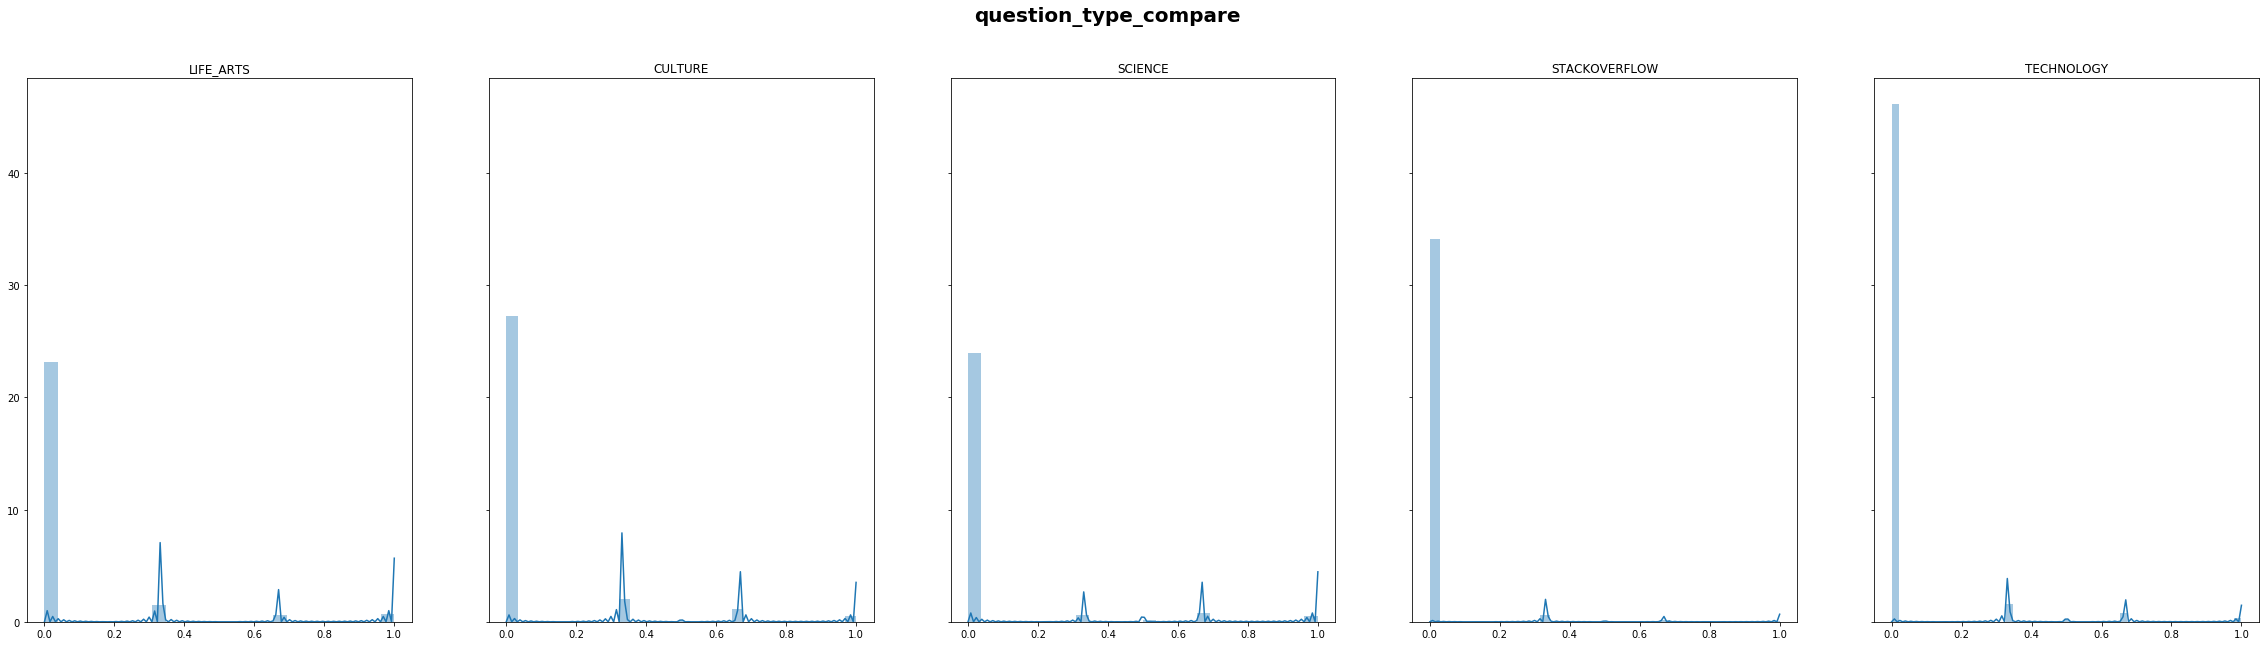

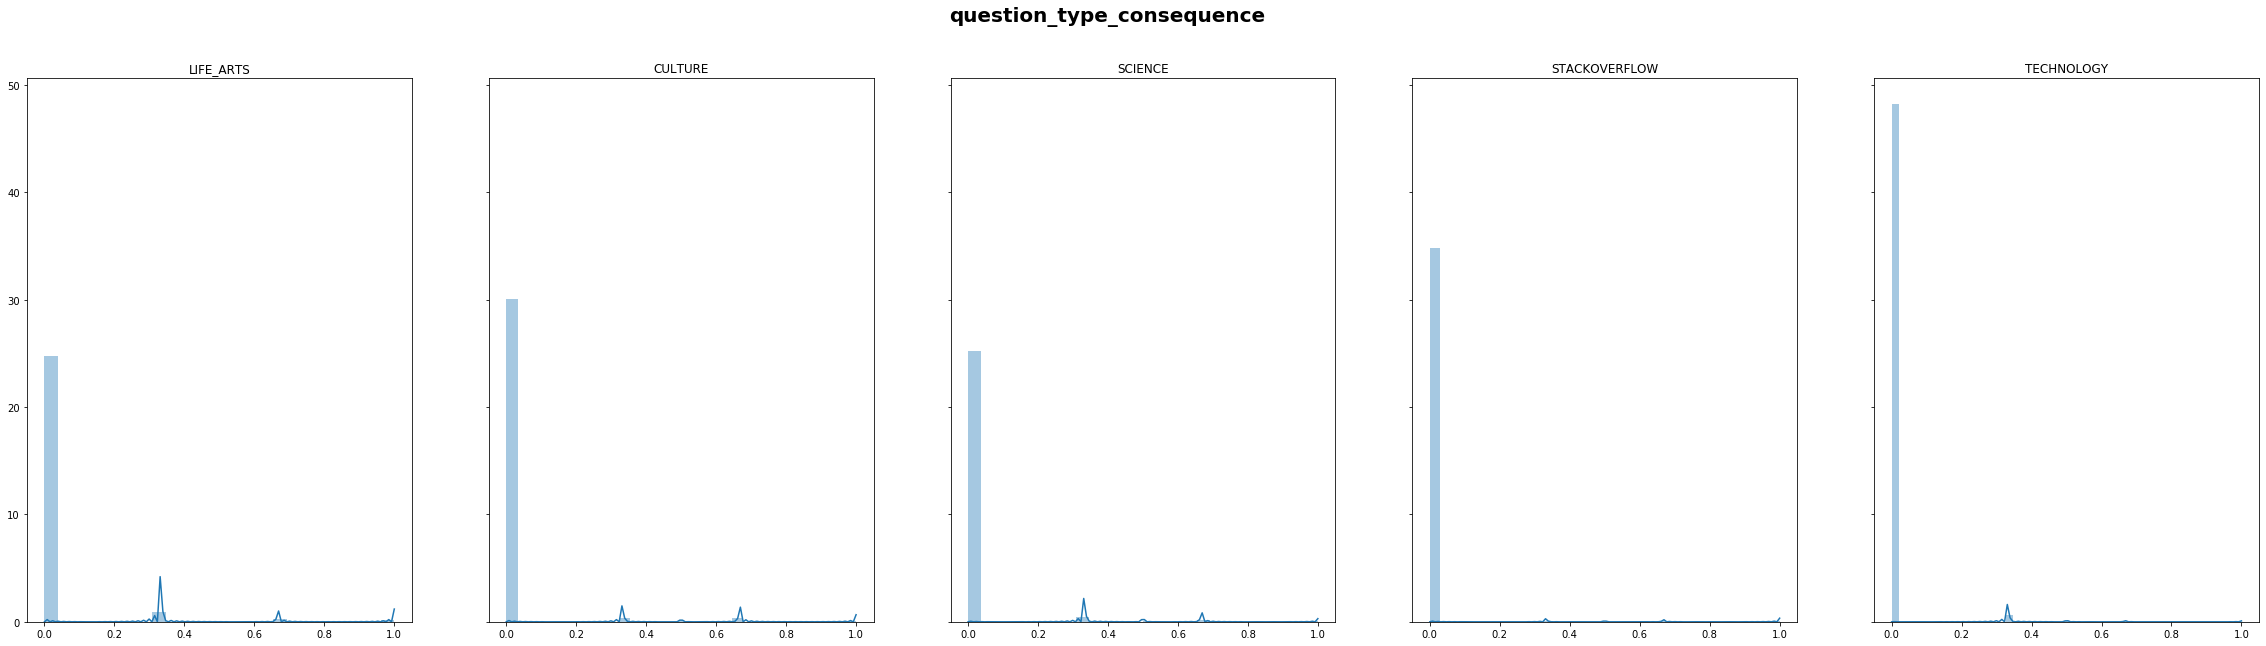

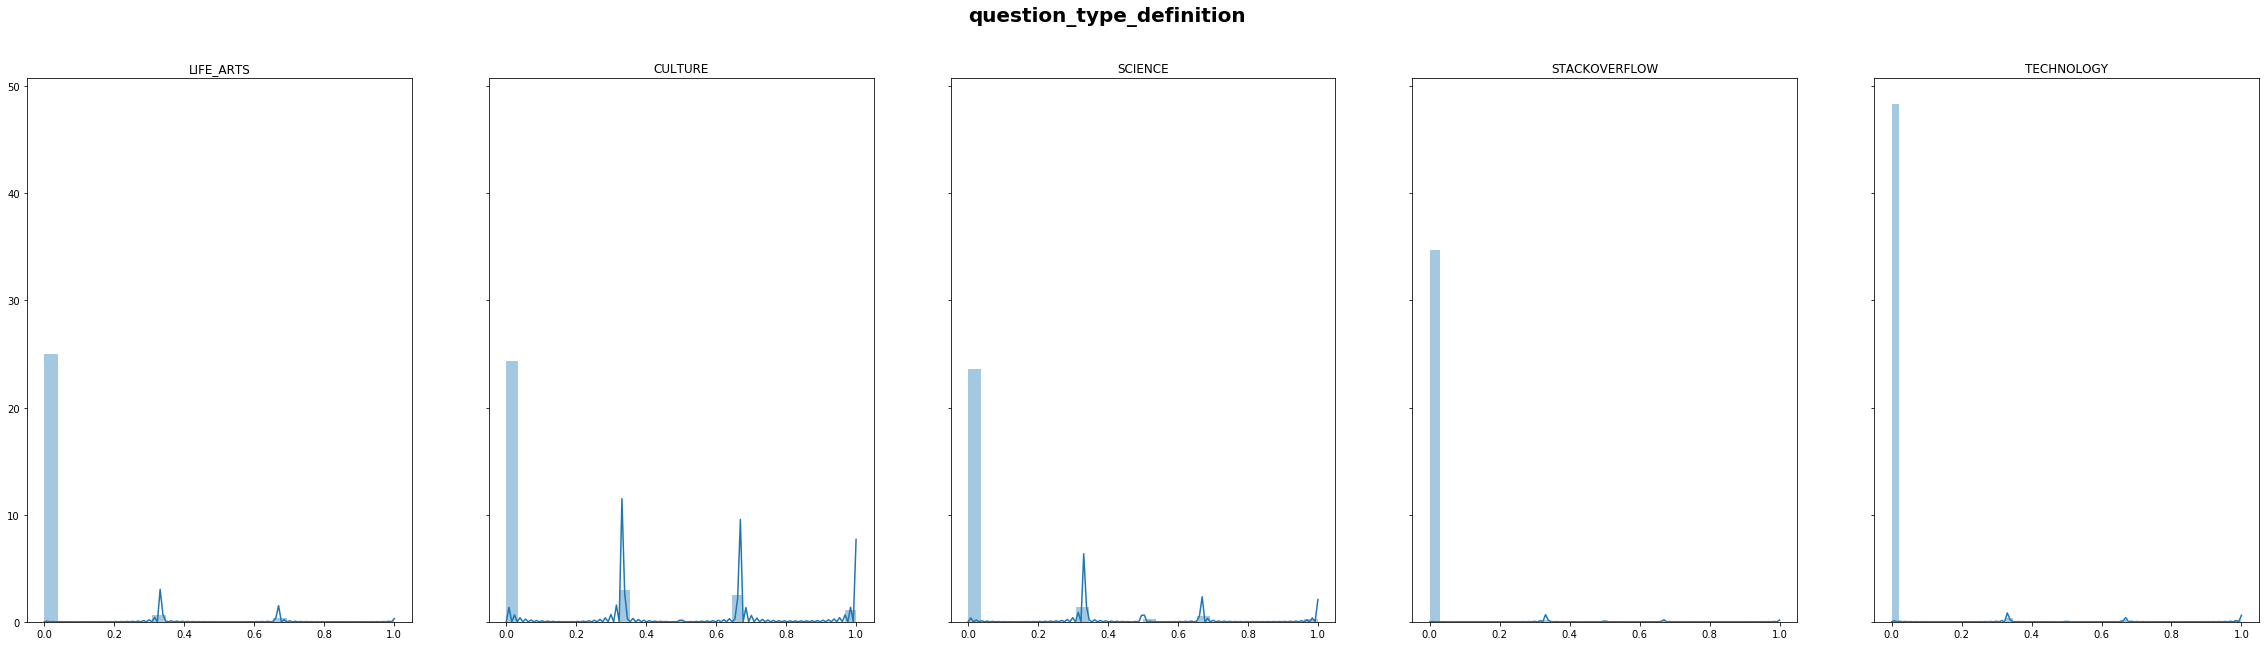

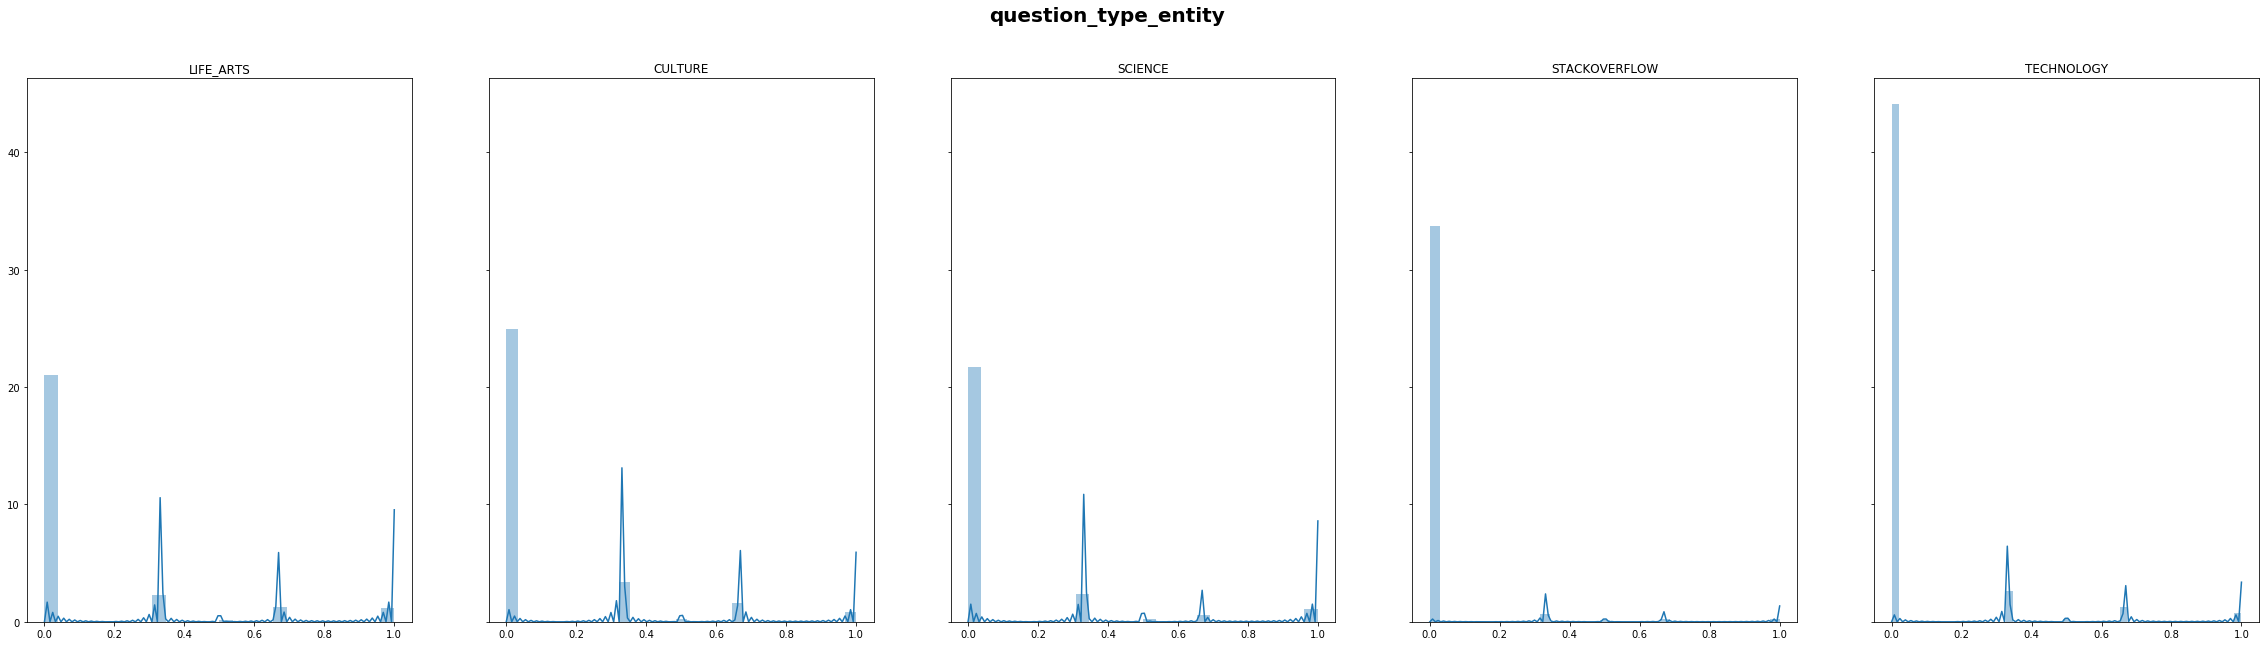

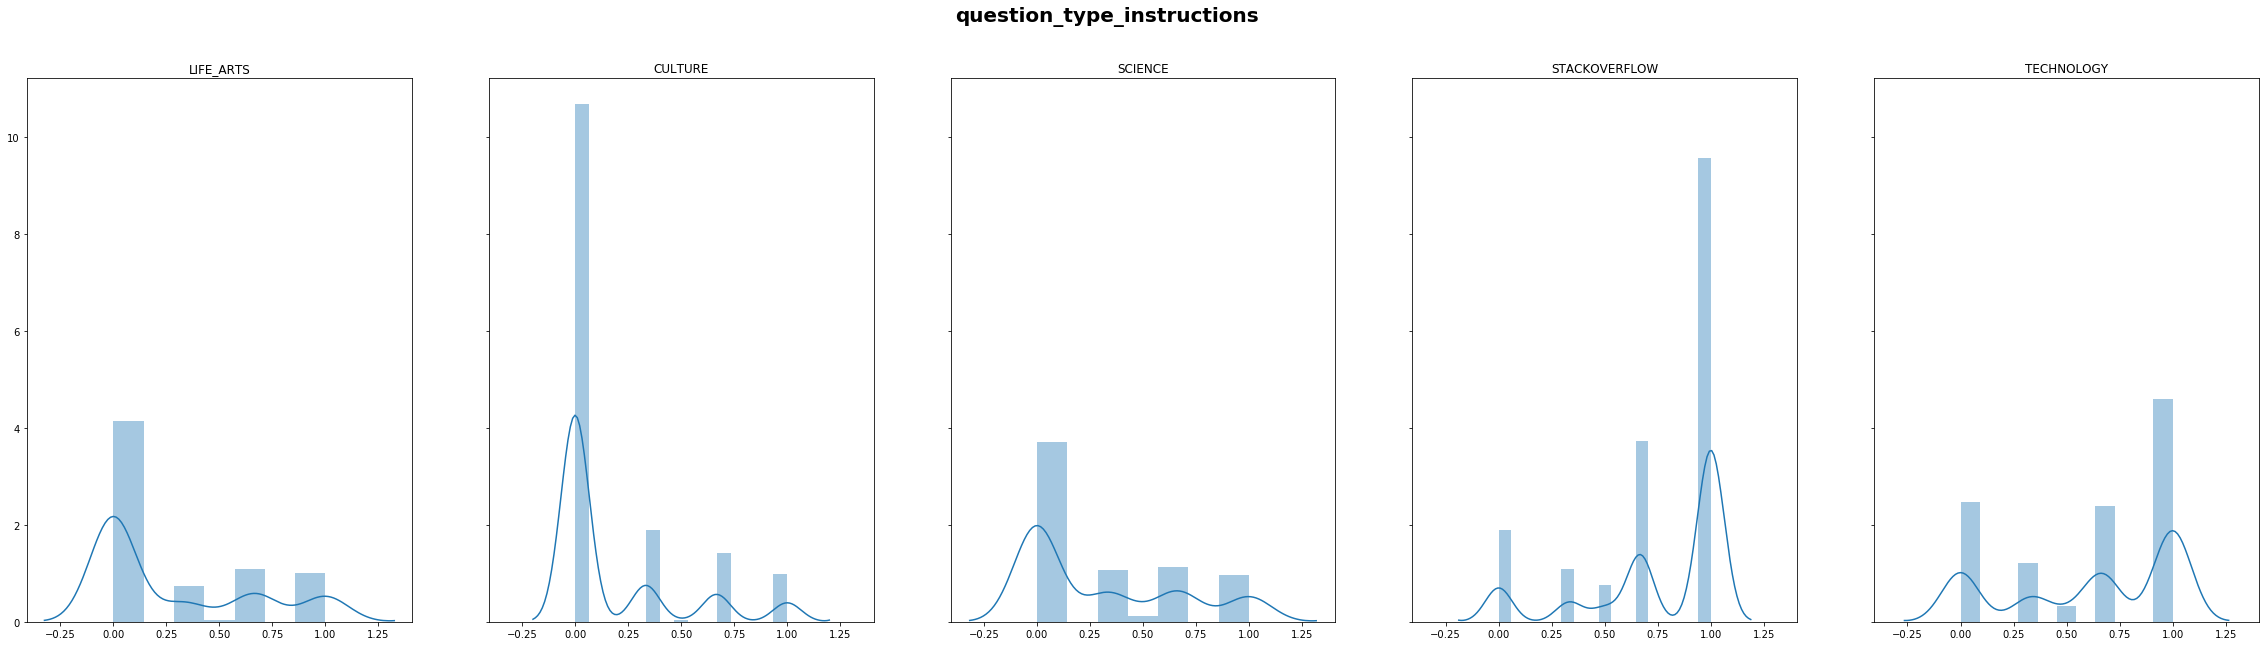

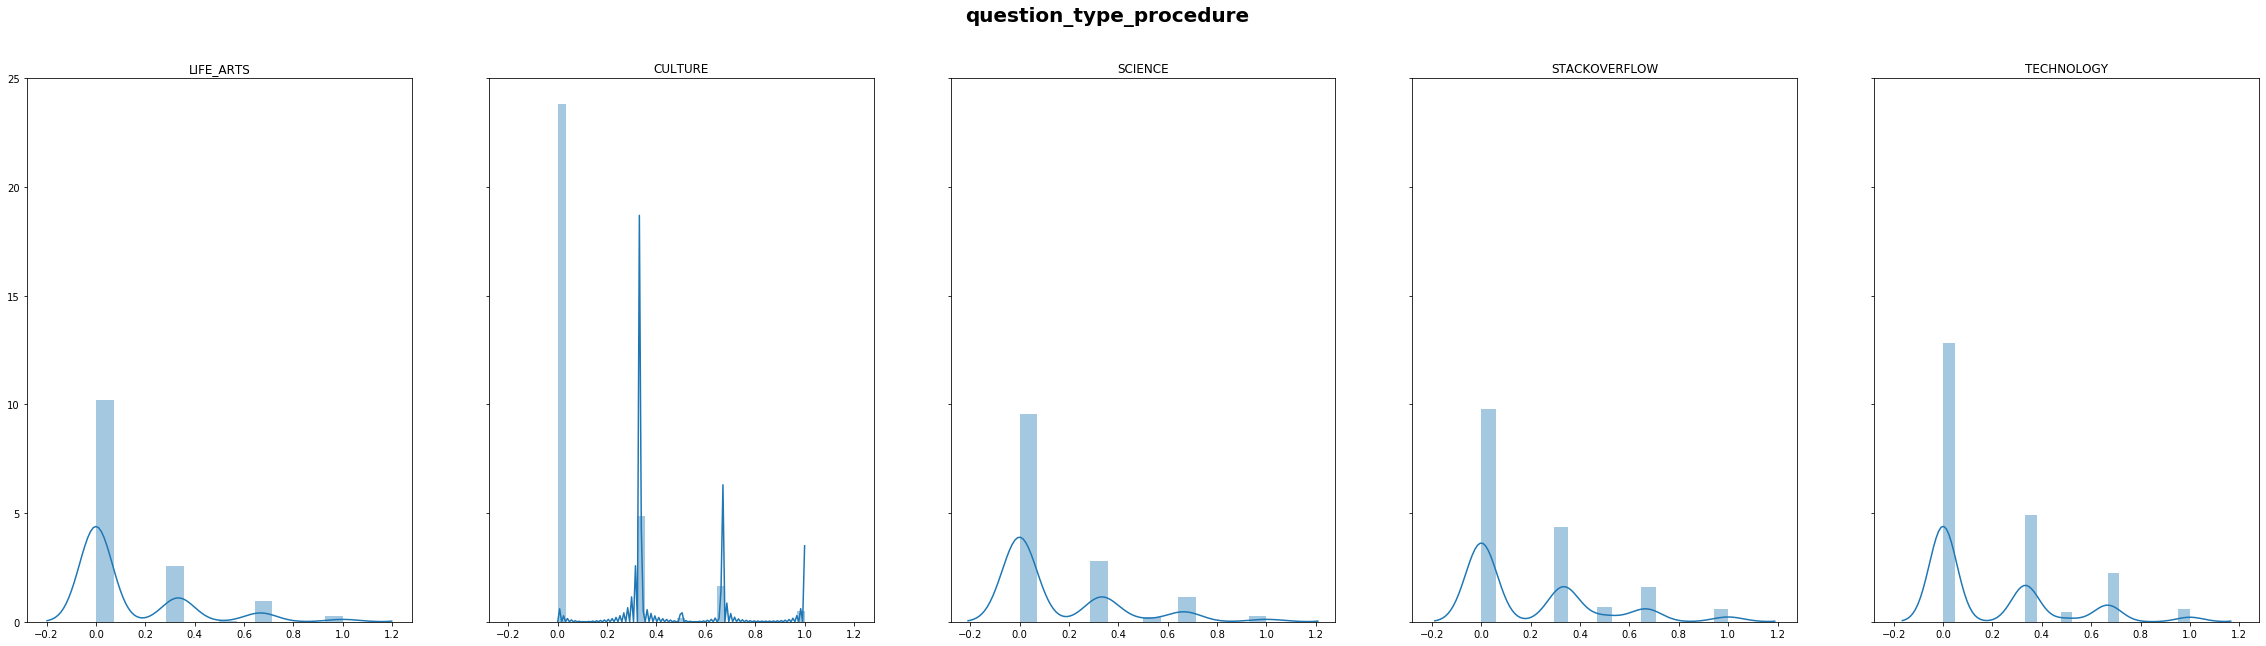

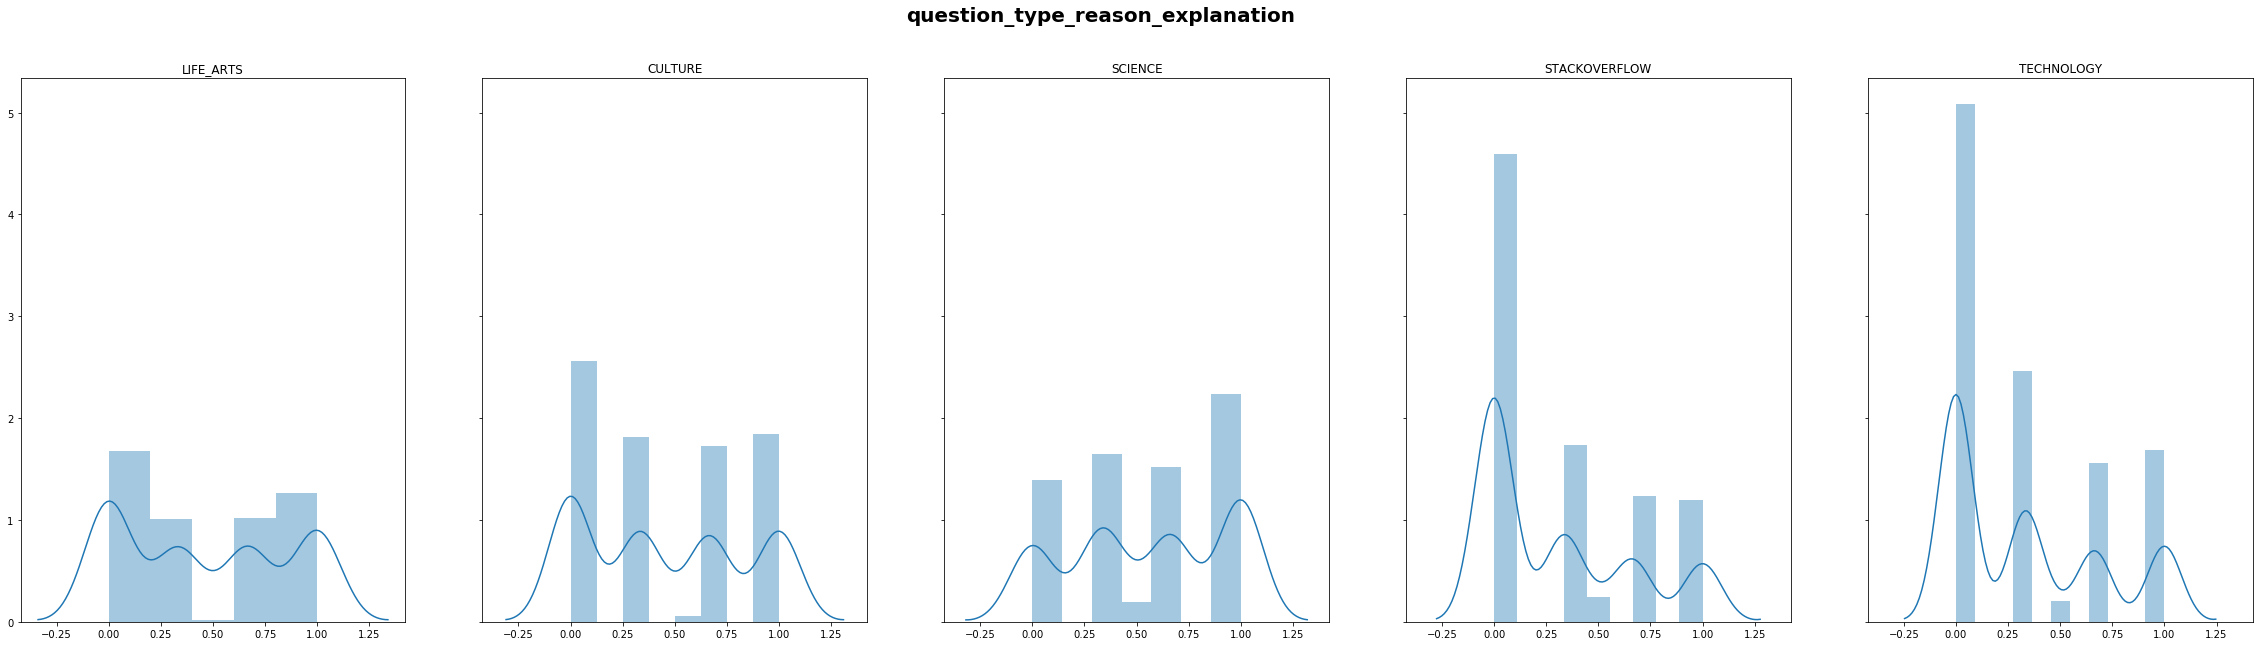

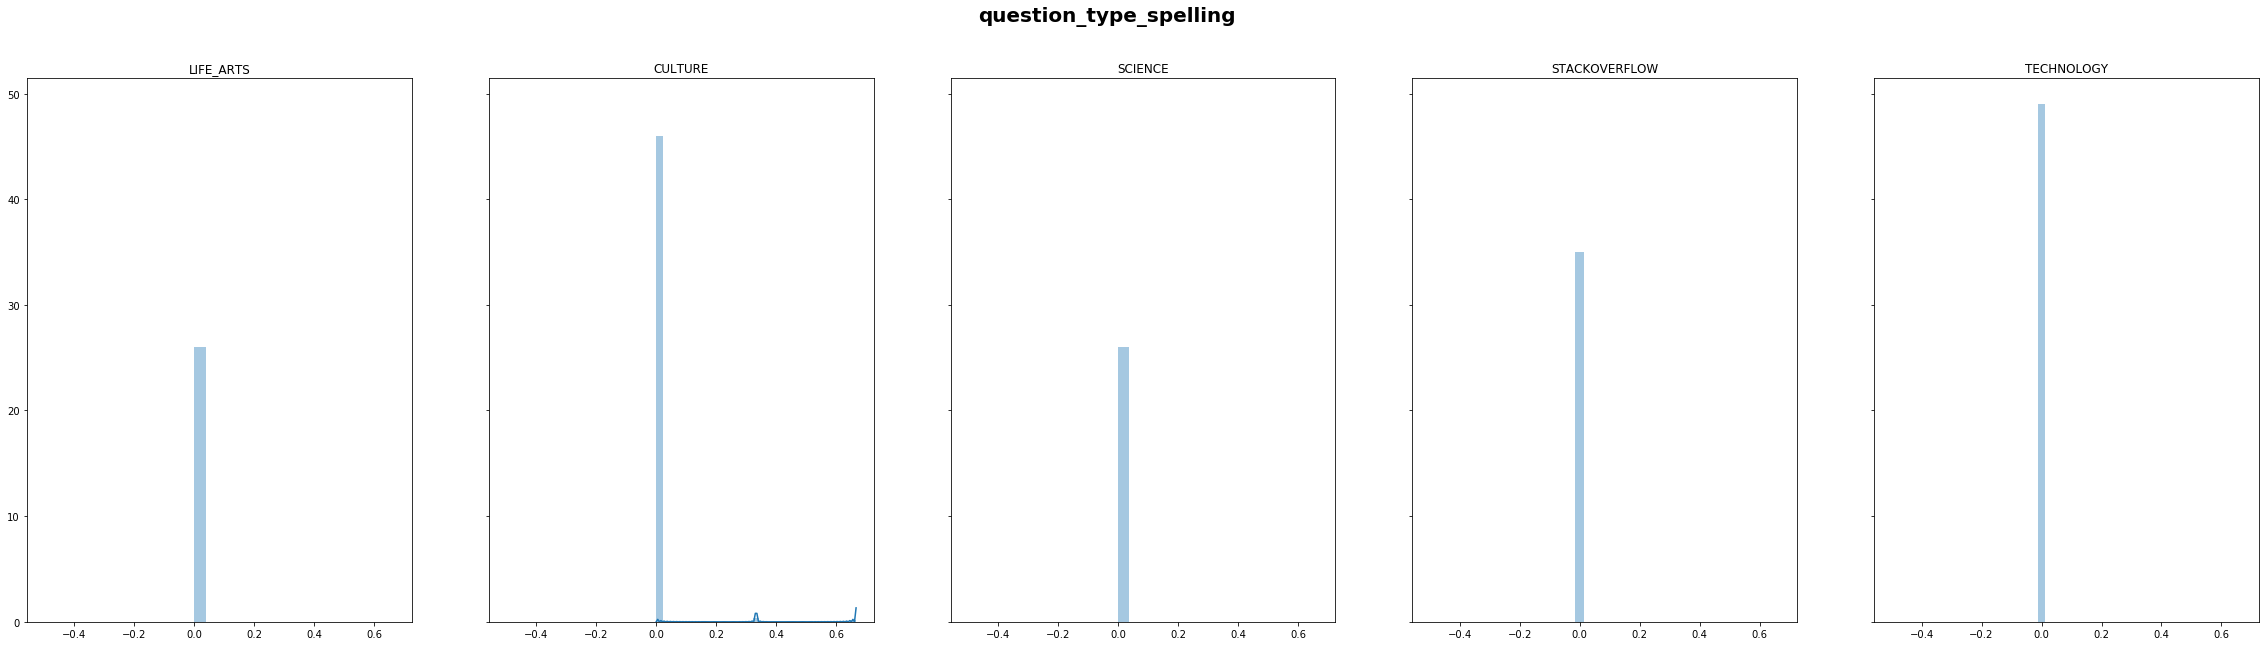

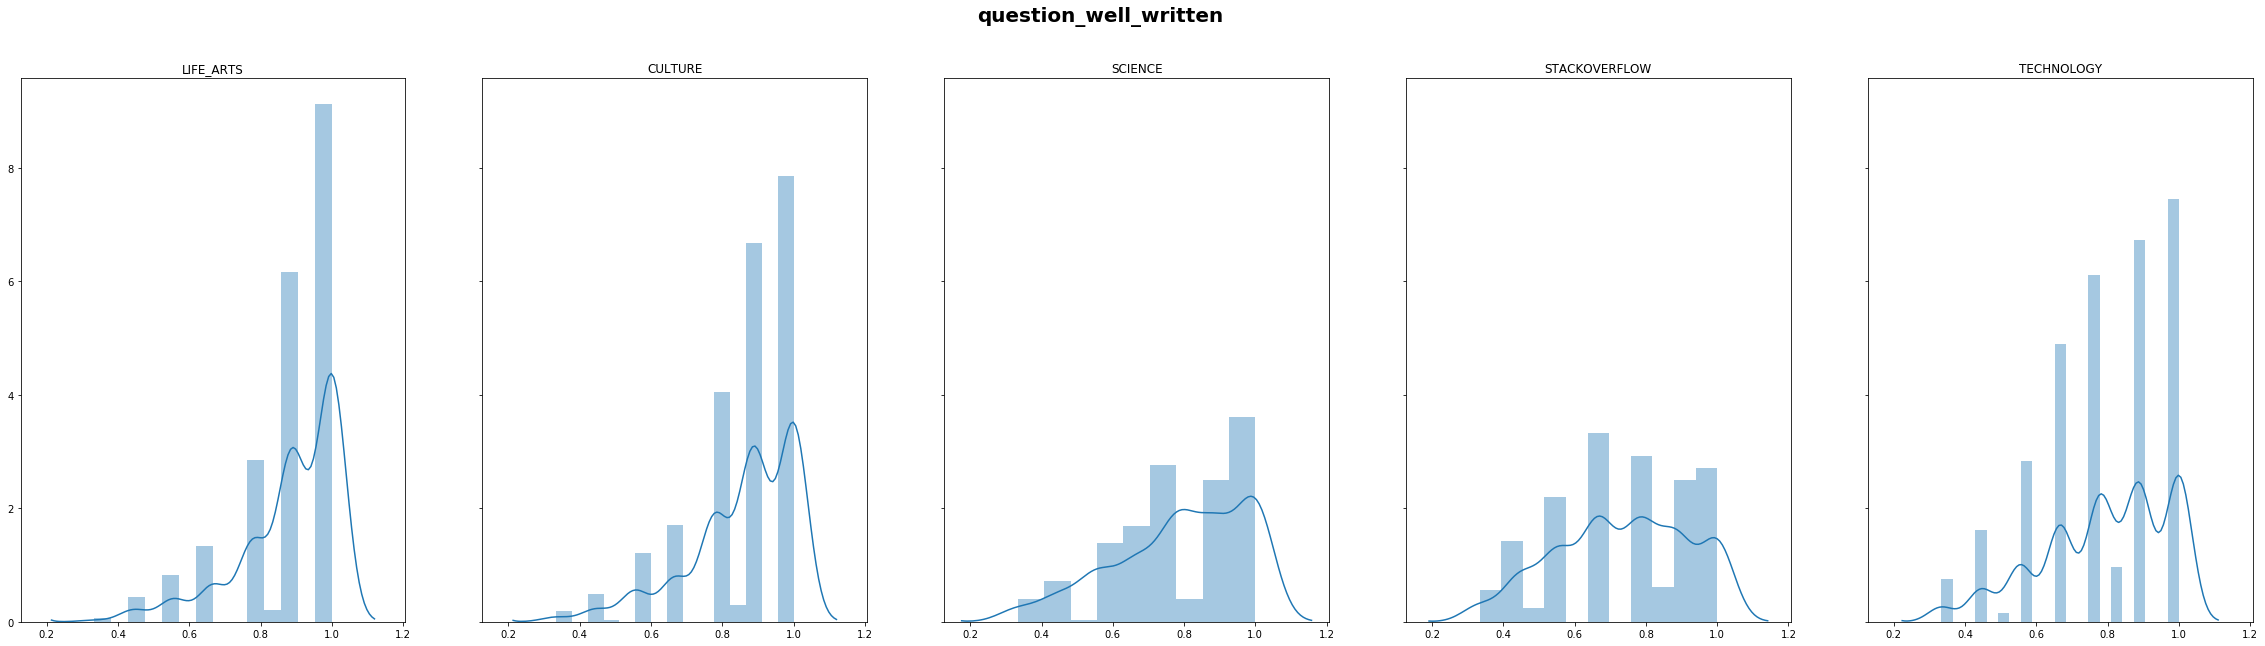

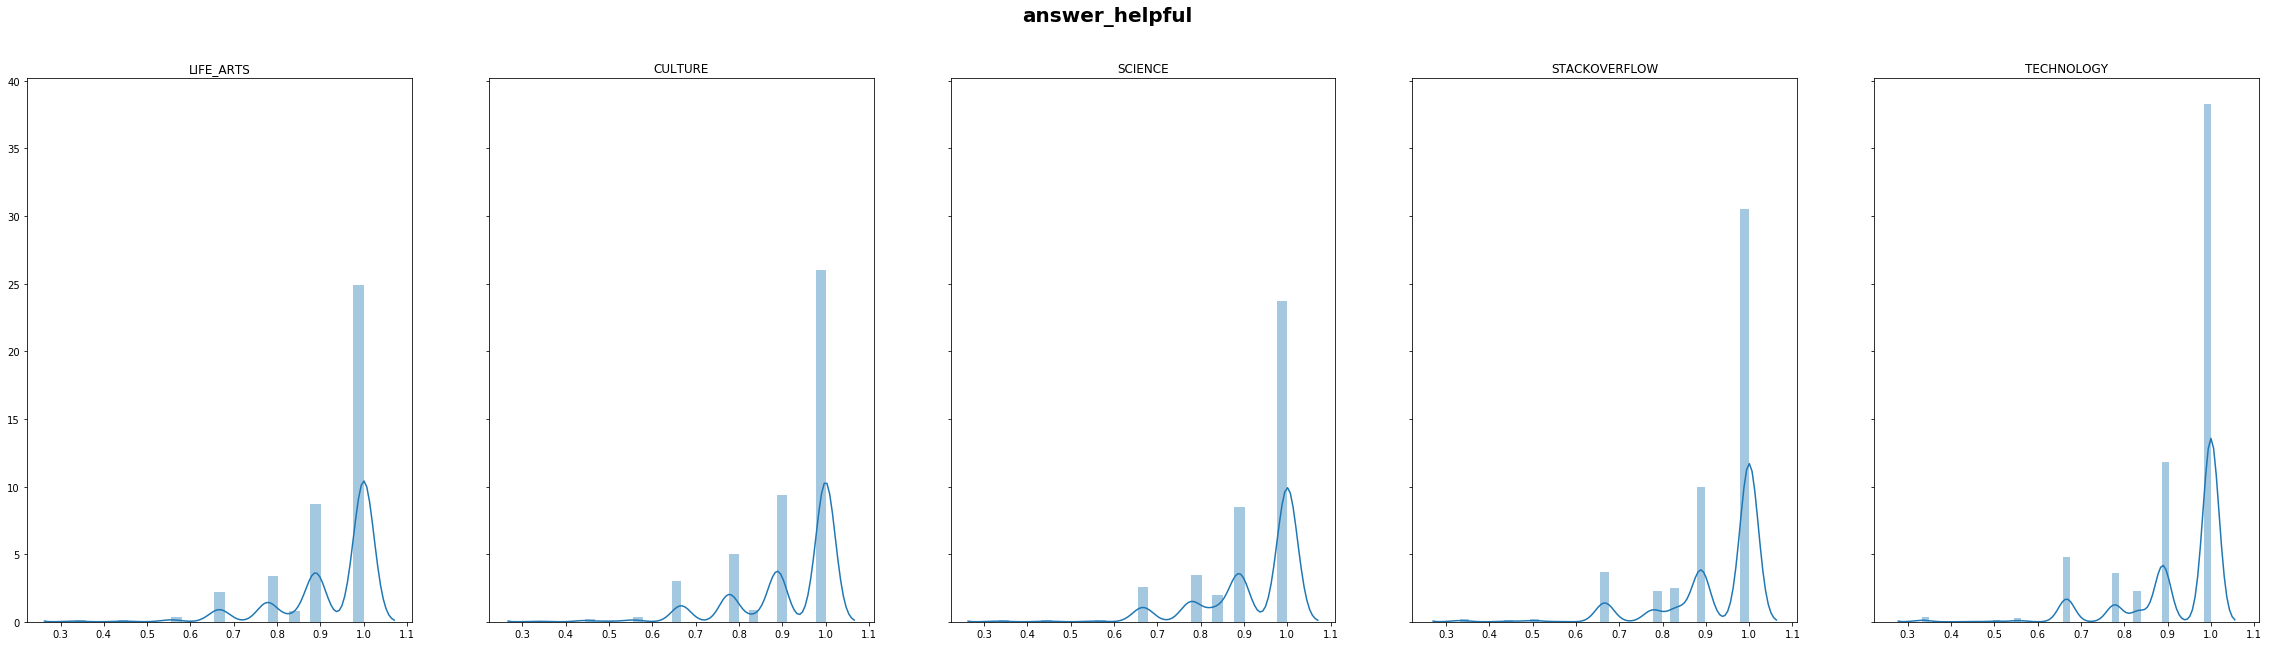

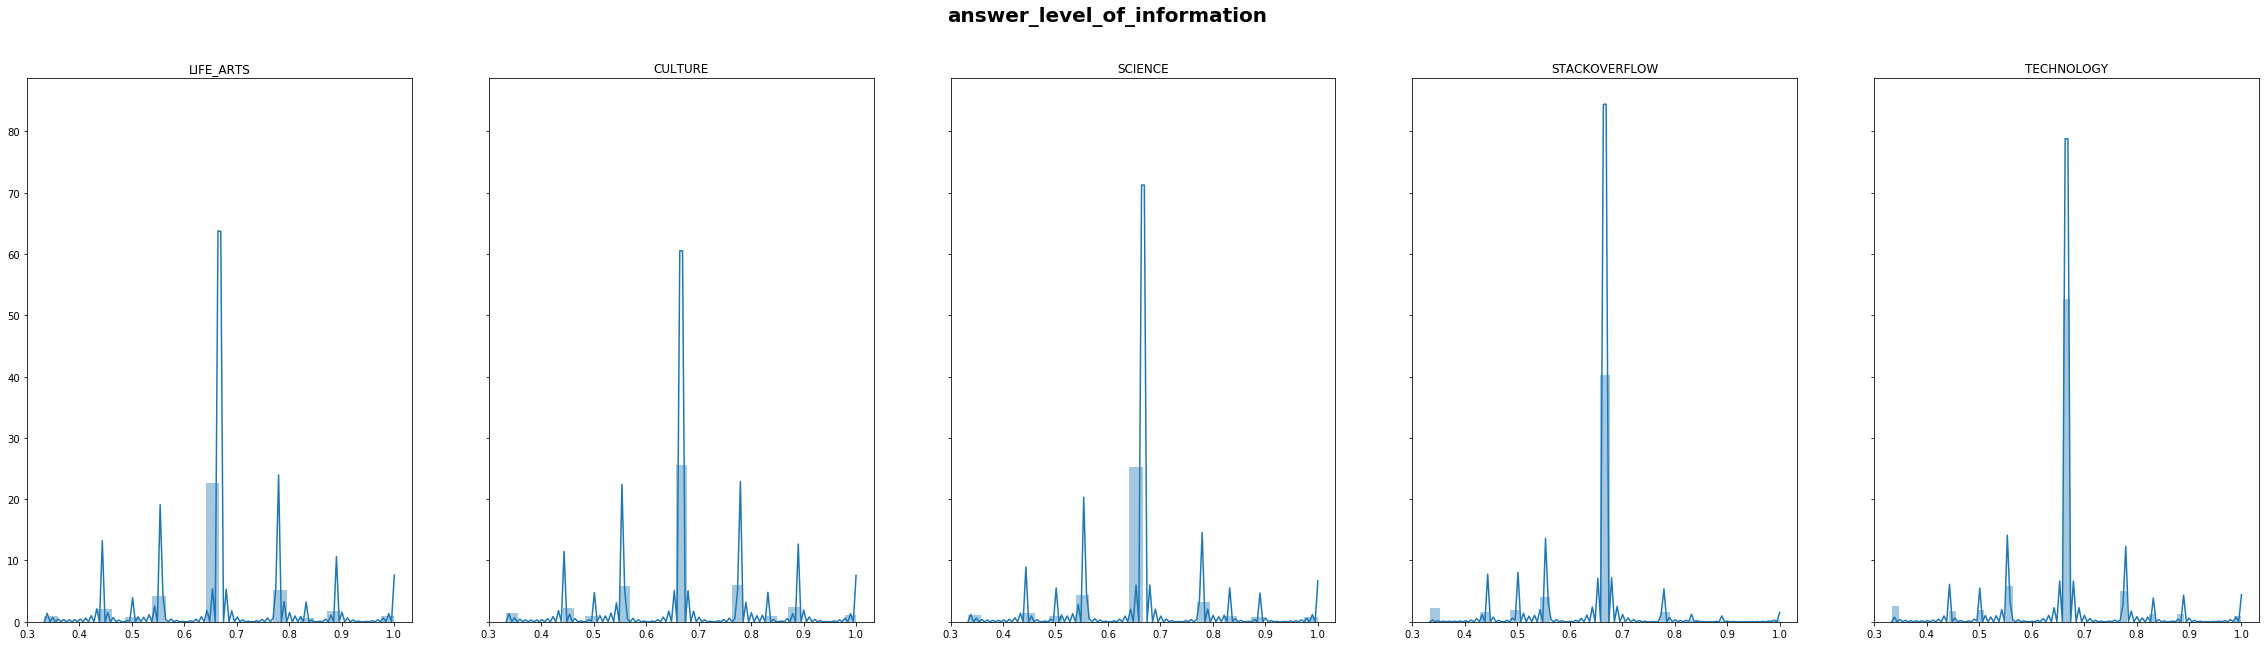

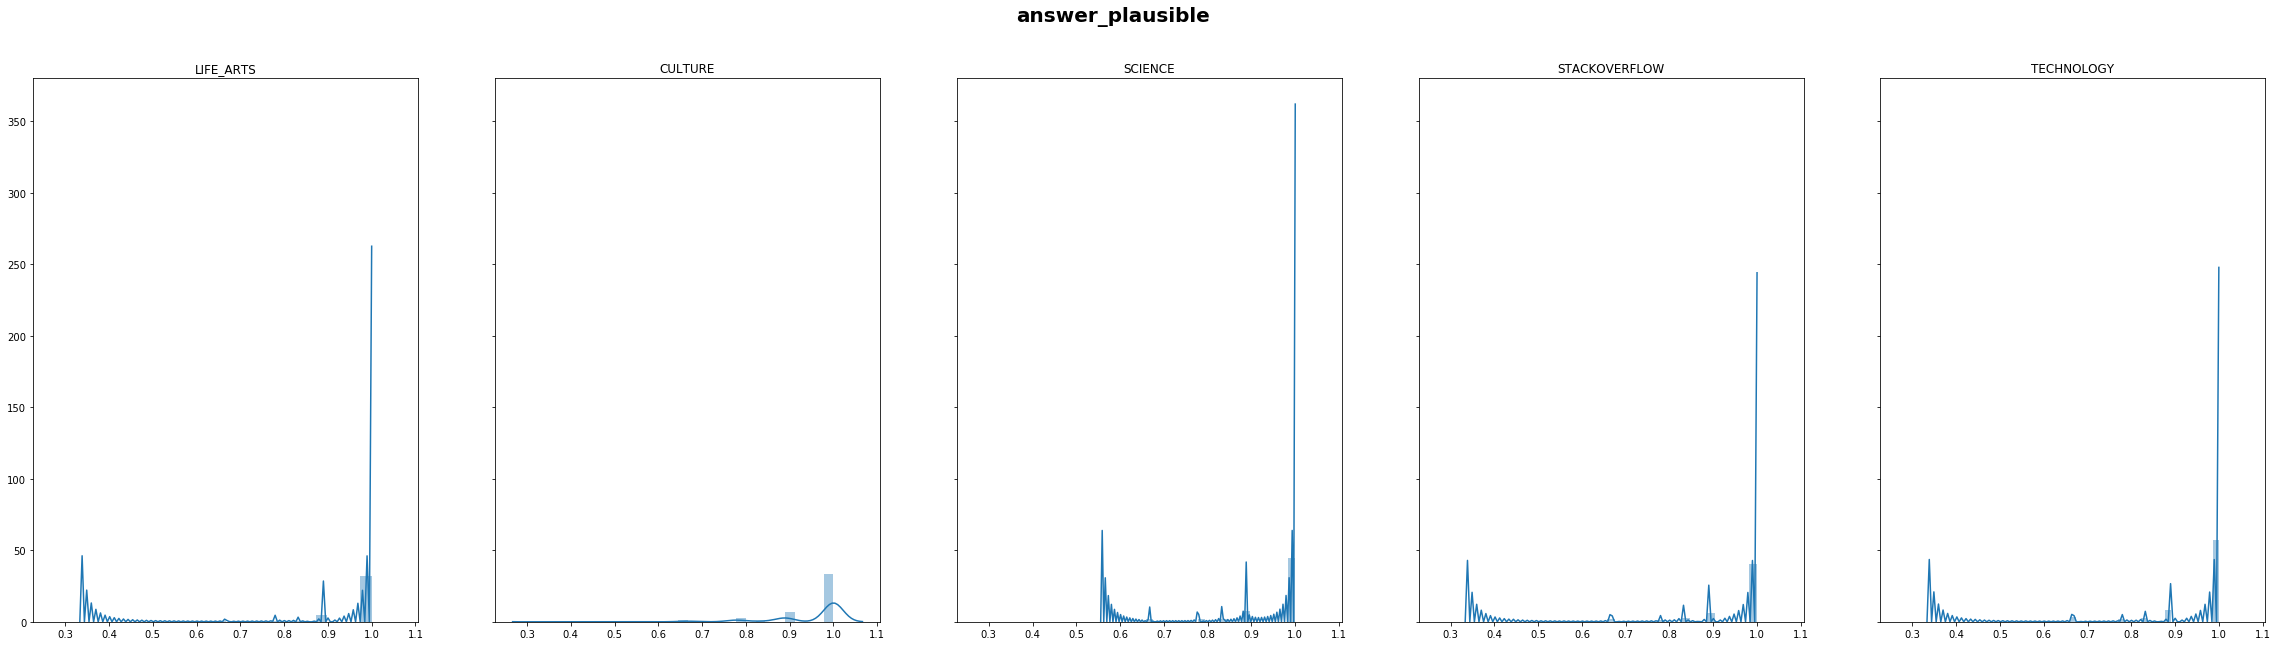

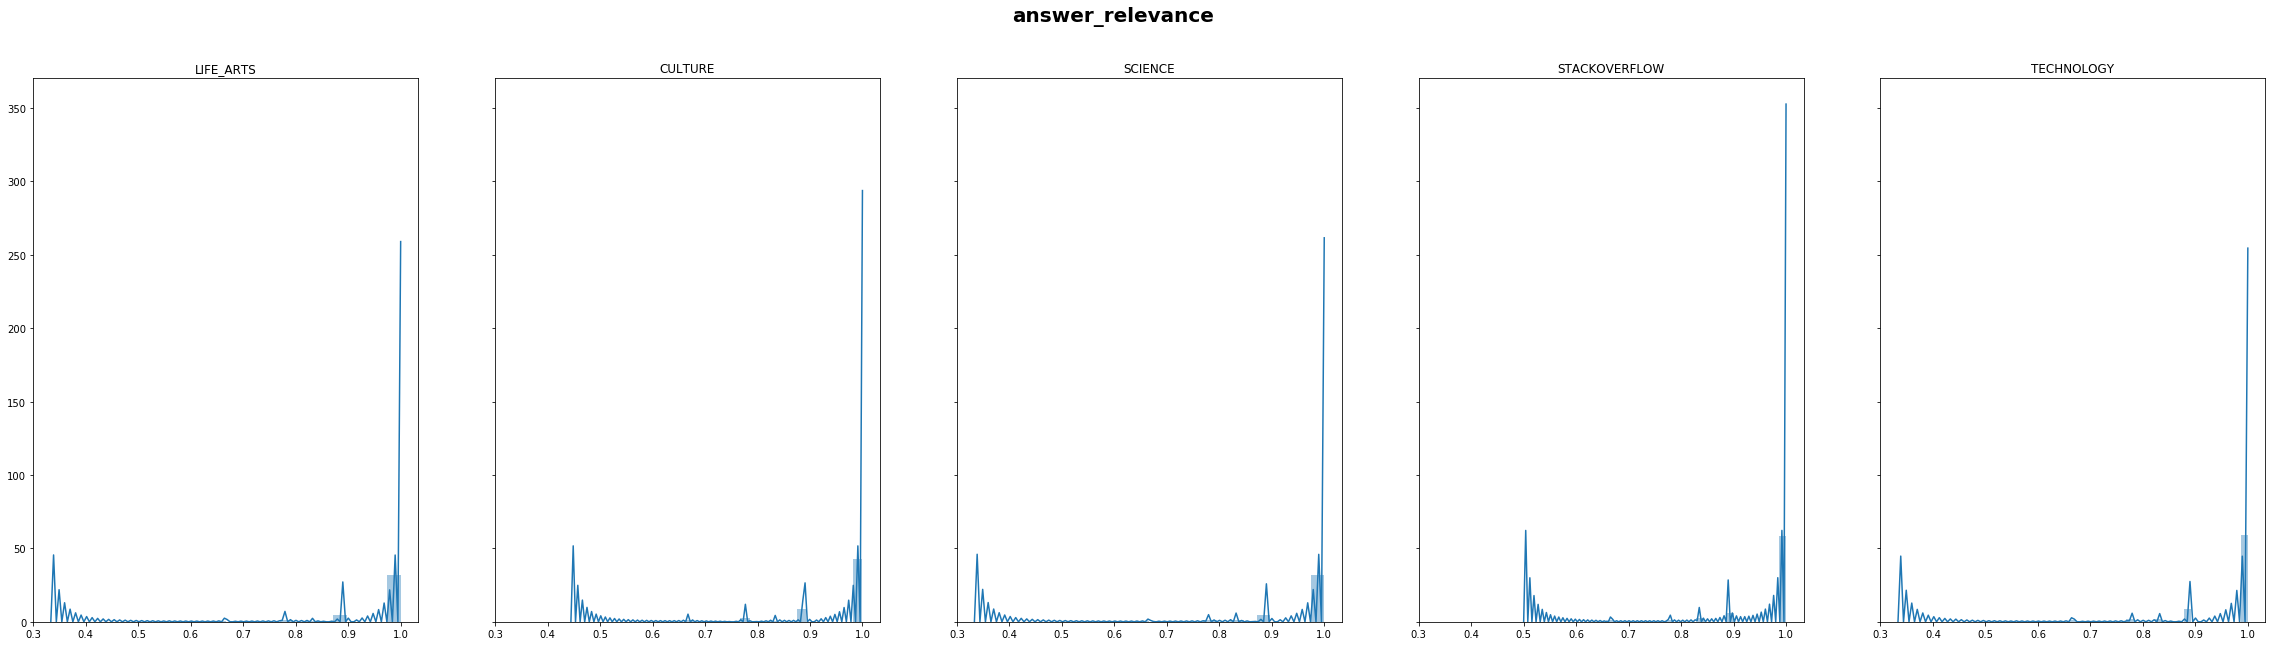

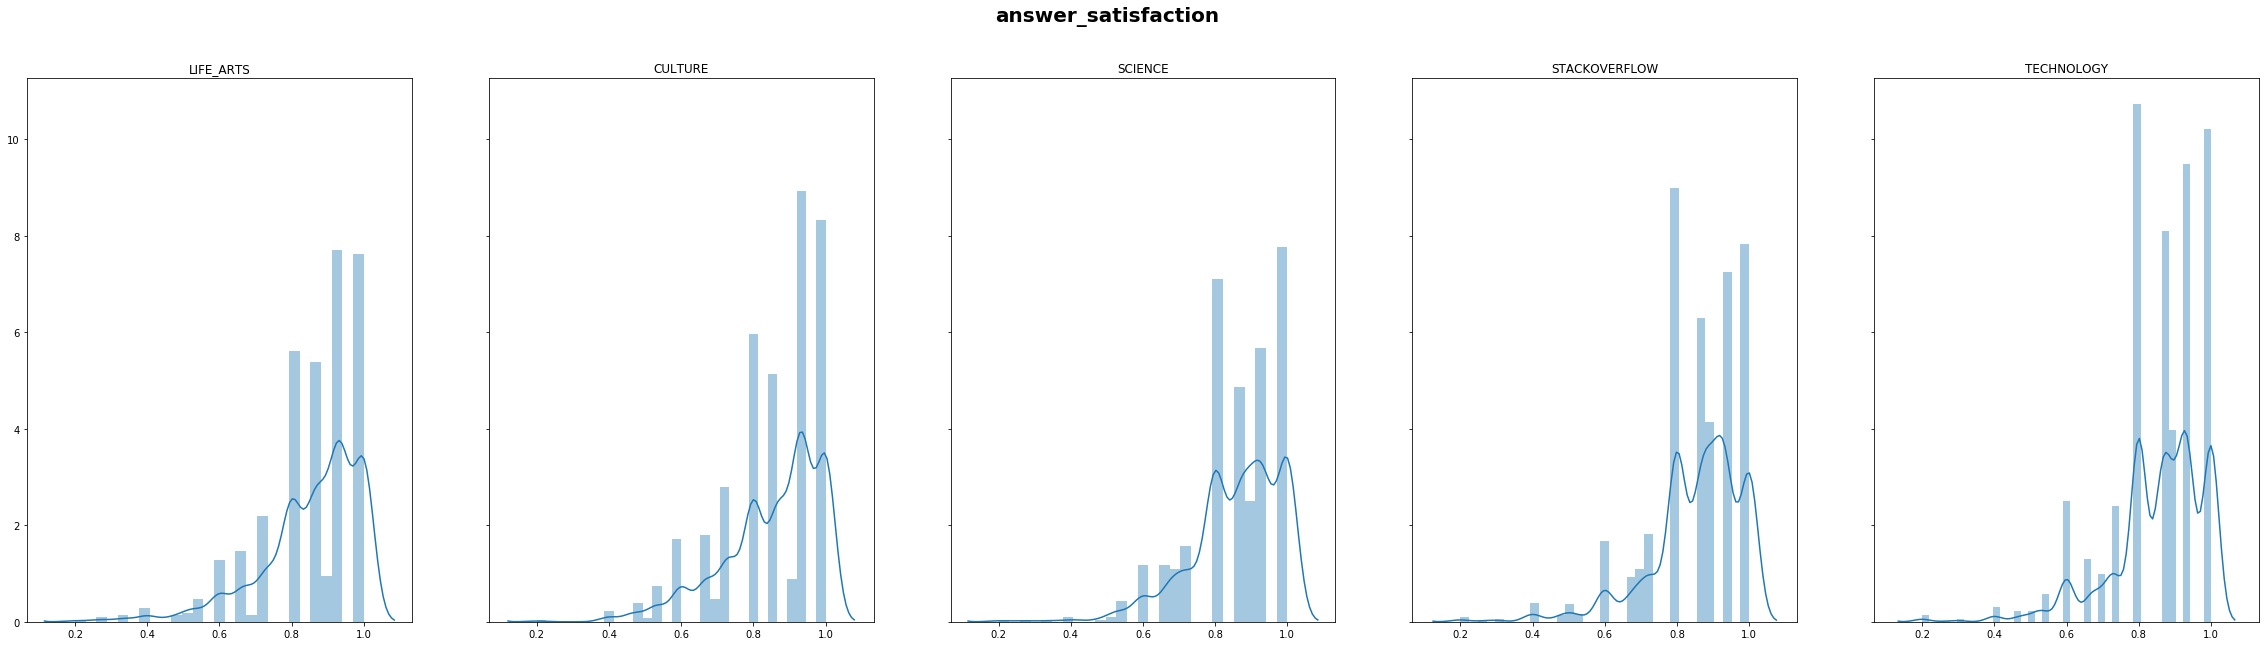

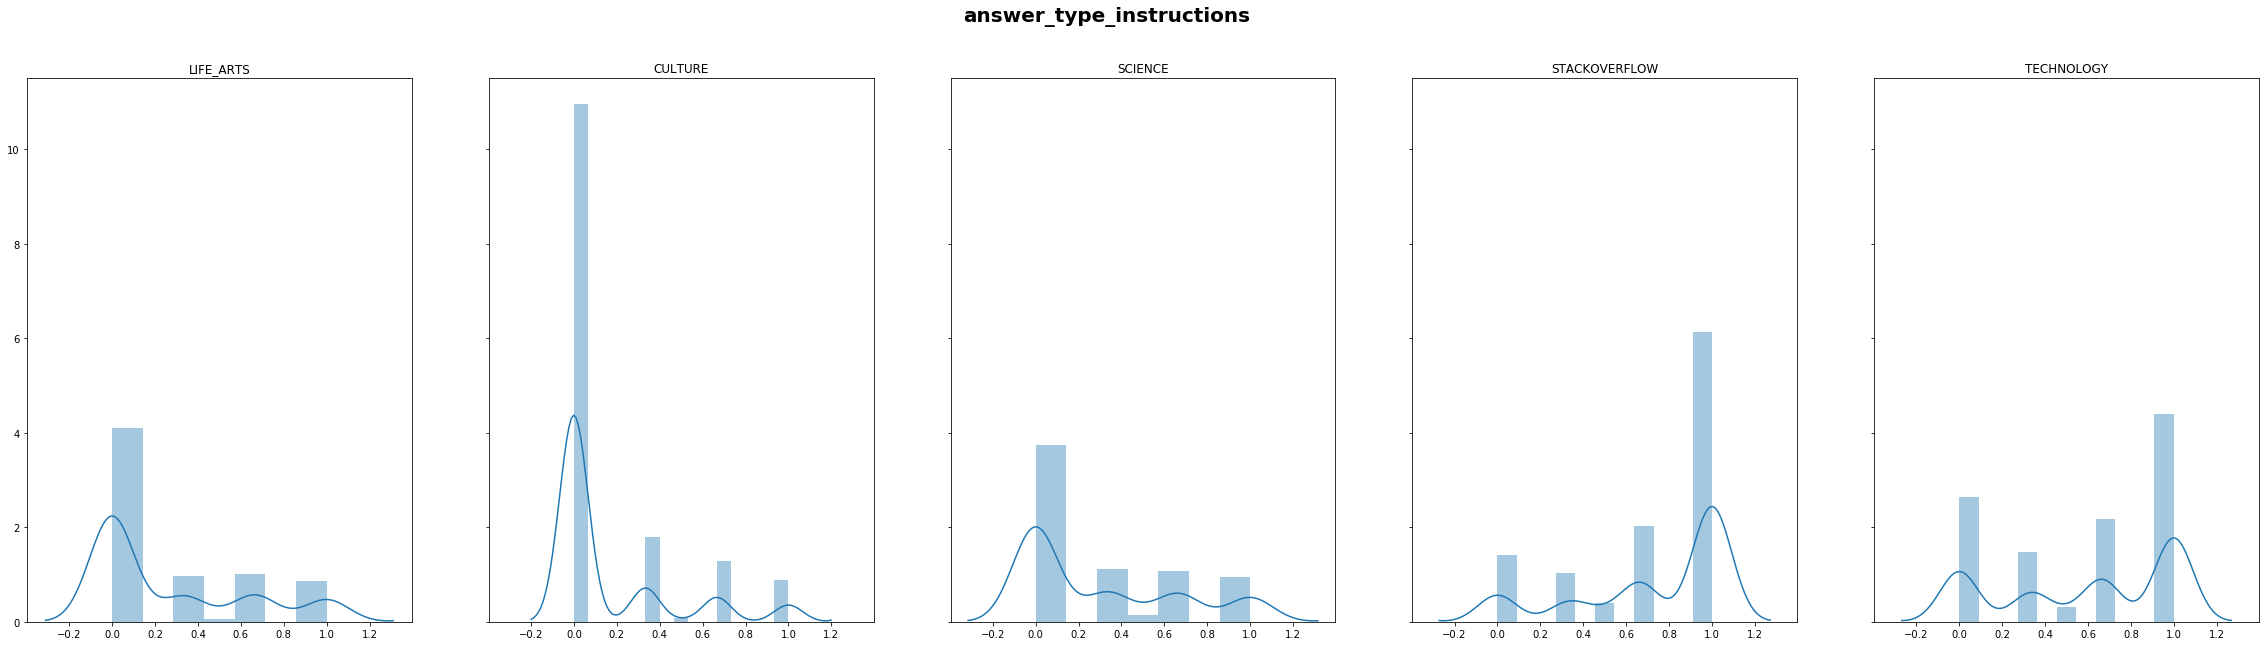

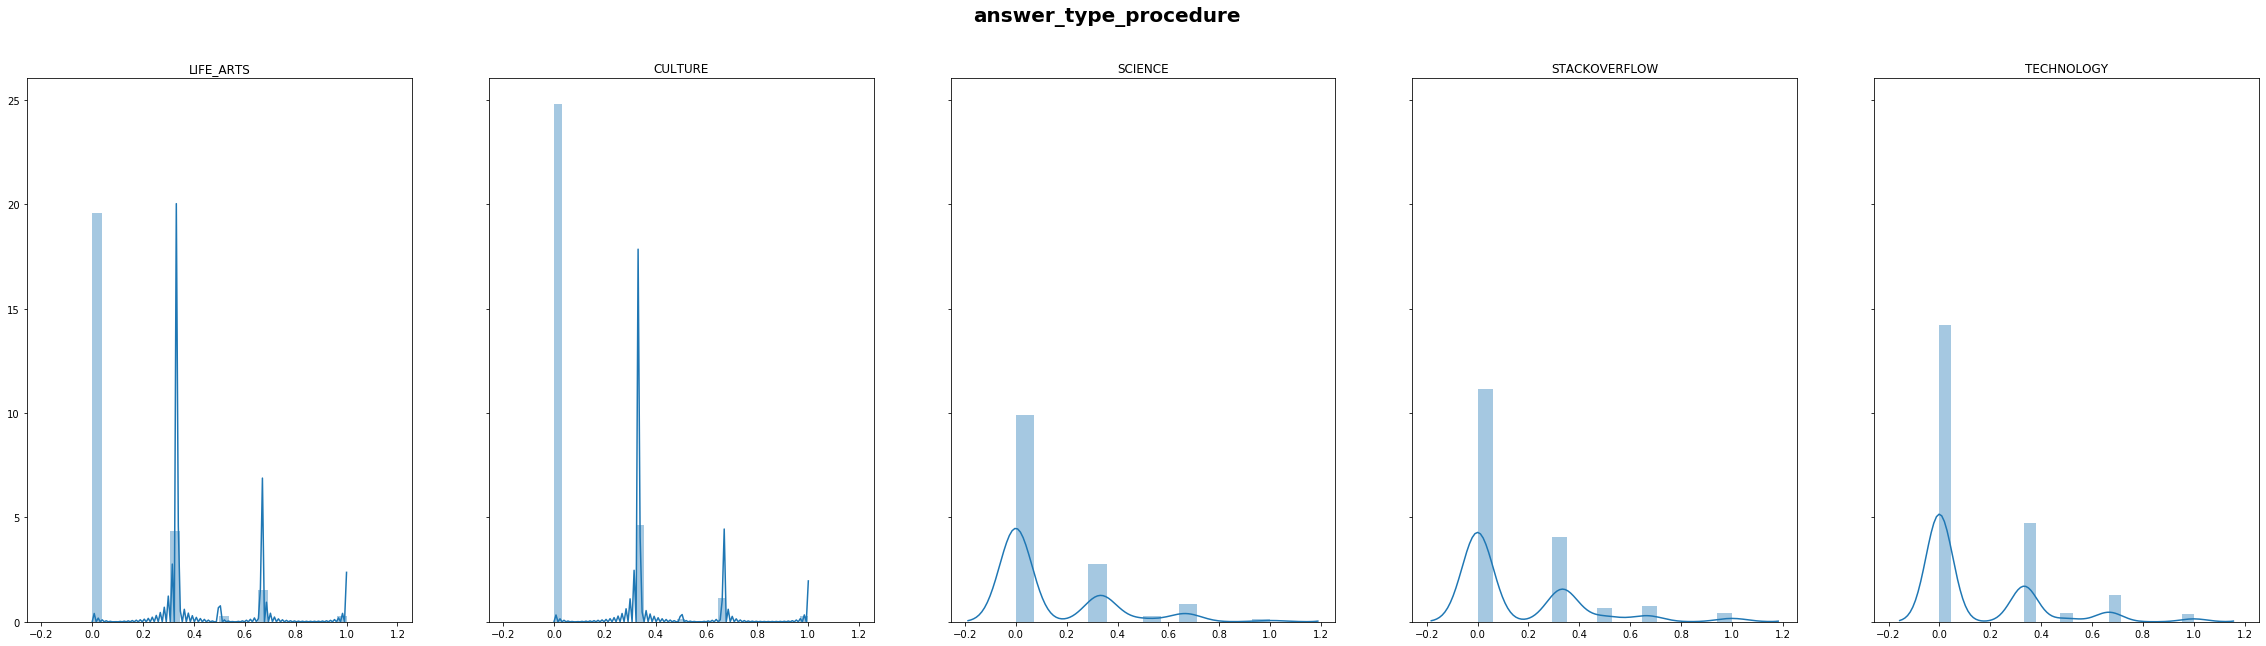

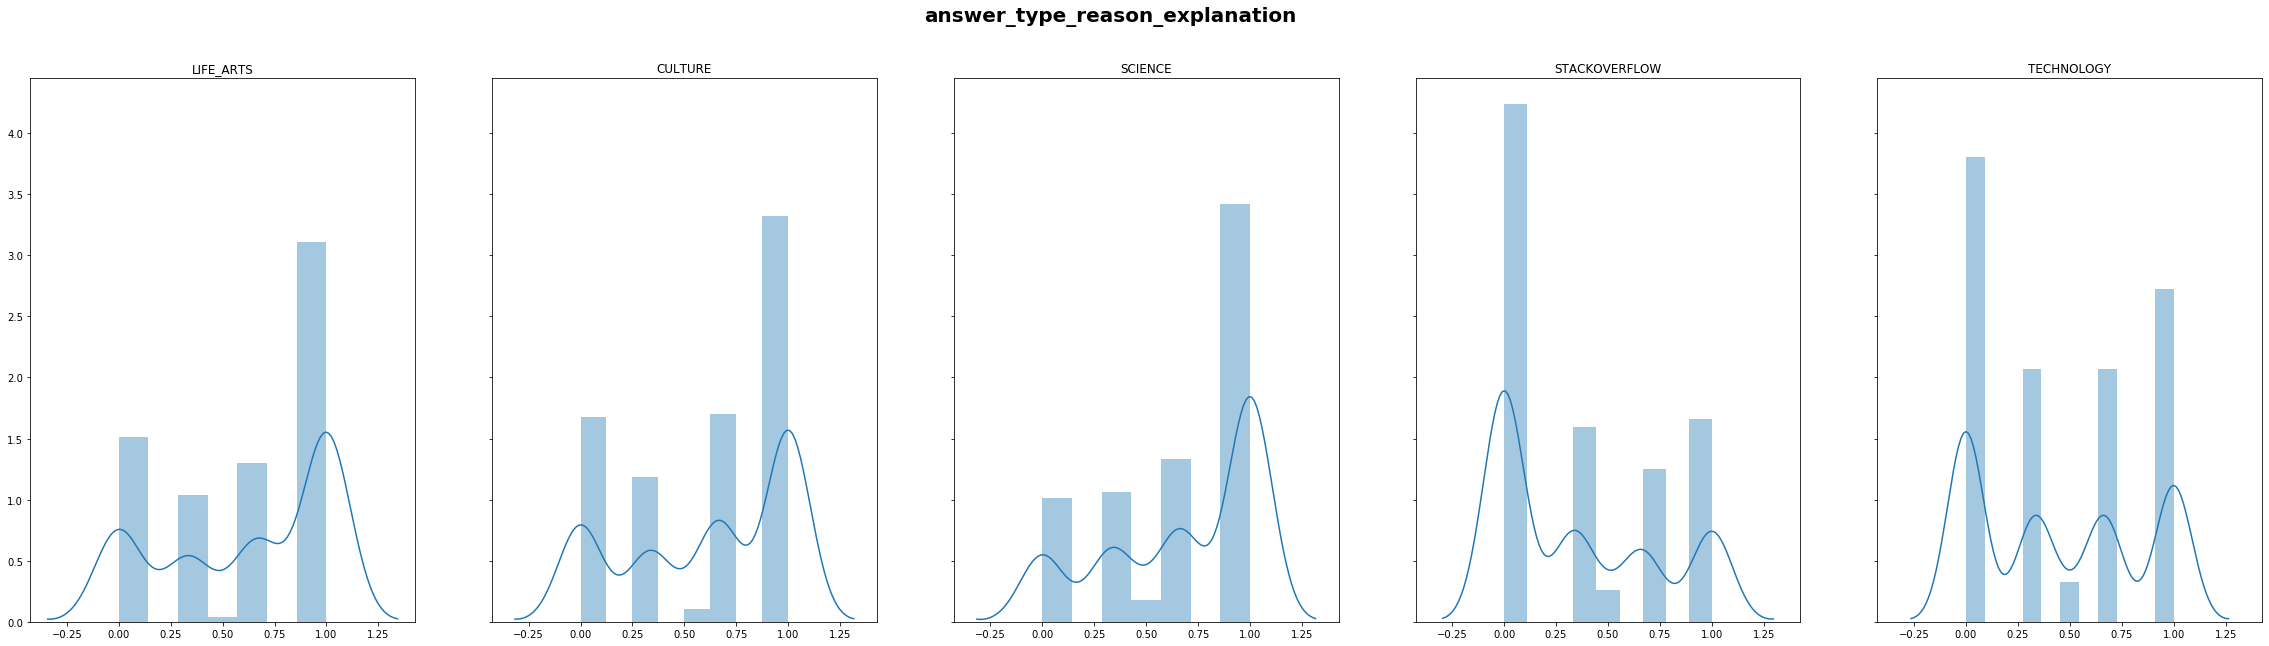

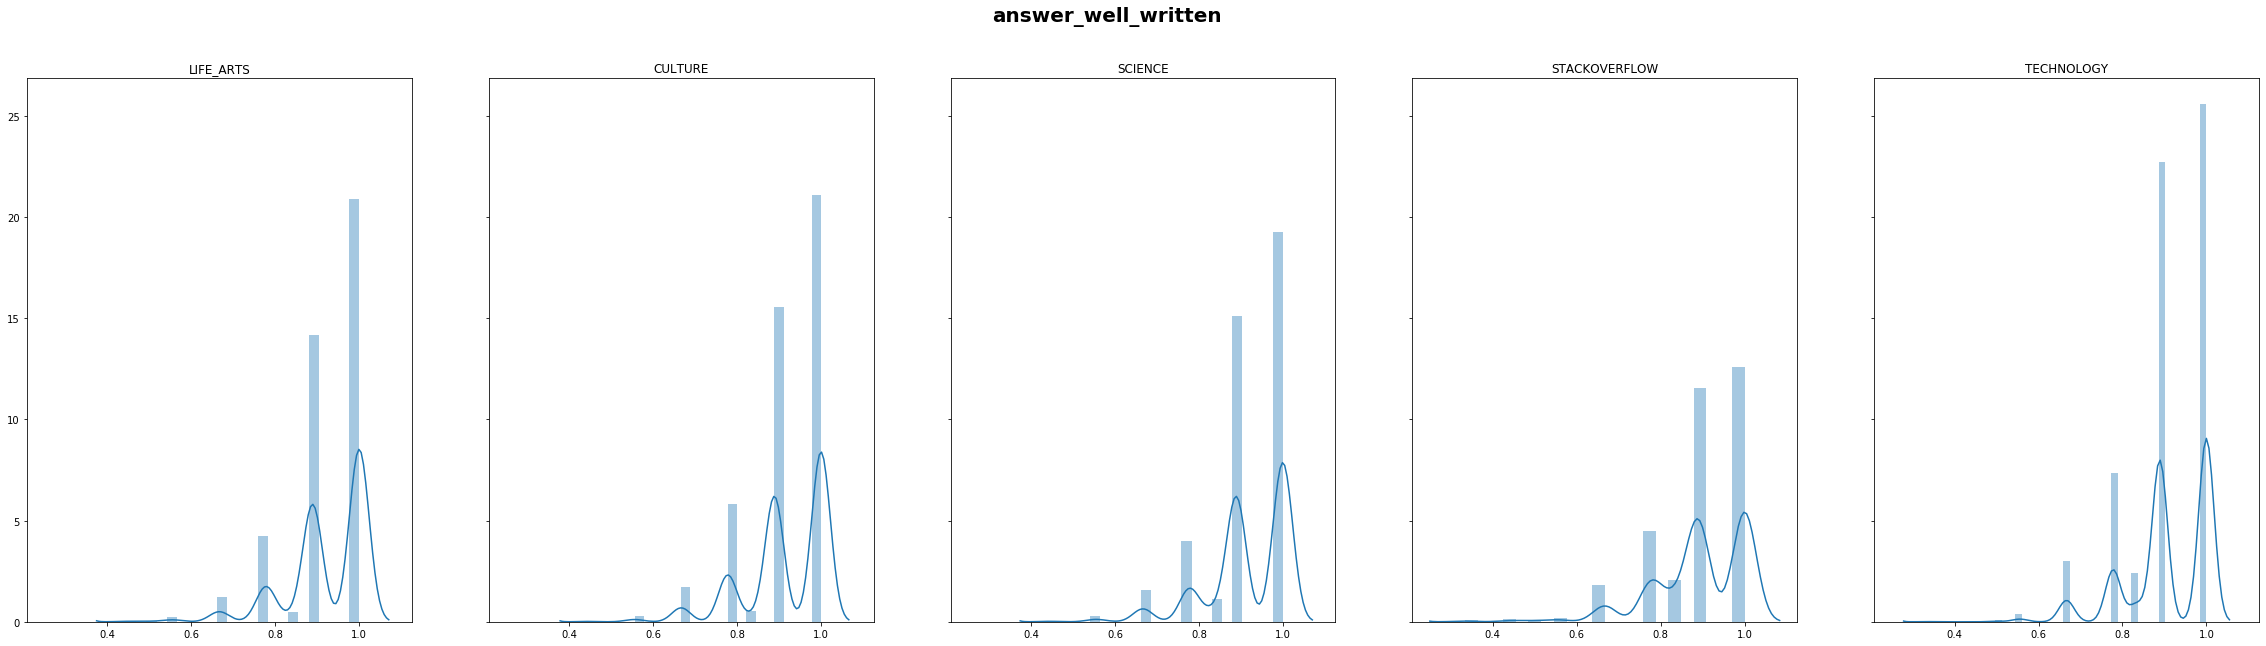

In [40]:
for col in targets:
    f, axes = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(40, 10))
    sns.distplot(train[train['category'] == 'LIFE_ARTS'][col], ax=axes[0], axlabel=False).set_title('LIFE_ARTS')
    sns.distplot(train[train['category'] == 'CULTURE'][col], ax=axes[1], axlabel=False).set_title('CULTURE')
    sns.distplot(train[train['category'] == 'SCIENCE'][col], ax=axes[2], axlabel=False).set_title('SCIENCE')
    sns.distplot(train[train['category'] == 'STACKOVERFLOW'][col], ax=axes[3], axlabel=False).set_title('STACKOVERFLOW')
    sns.distplot(train[train['category'] == 'TECHNOLOGY'][col], ax=axes[4], axlabel=False).set_title('TECHNOLOGY')
    
    f.suptitle(col, fontsize=20, fontweight='bold')
    plt.show()

## Data Preparation